In [65]:
#Import the required Libraries.
#EDA Case Study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read the data in pandas
import os
df= pd.read_csv("C:/Users/dbanerjee/Downloads/device_crash_dataset.csv")


# Business Objective : Have the ability to predict device crash based on device parameters and usage metrics

In [67]:
df.describe()

,Device_ID,CPU_Usage,Memory_Usage,Disk_Usage,Network_Activity,System_Average,Battery_Level,App _Count,Background _Processes,GPU _Usage,Temperature,Storage_Available,Screen_Brightness
count,100000.000000,99992.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99920.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,59.608369,4248.675540,54.556160,501.476770,49.502570,49.604270,30.072890,25.060140,49.675951,64.50127,249.577620,49.428810
std,28867.657797,23.170724,2172.440528,25.951725,288.421596,28.787595,28.849014,17.056336,14.142609,29.437274,20.23293,144.314243,28.815349
min,1.000000,20.000000,500.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.00000,0.000000,0.000000
25%,25000.750000,40.000000,2360.000000,32.000000,252.000000,25.000000,25.000000,15.000000,13.000000,25.000000,47.00000,125.000000,24.000000
50%,50000.500000,60.000000,4255.000000,55.000000,502.000000,50.000000,50.000000,30.000000,25.000000,50.000000,64.00000,249.000000,50.000000
75%,75000.250000,80.000000,6134.000000,77.000000,751.000000,74.000000,75.000000,45.000000,37.000000,75.000000,82.00000,375.000000,74.000000
max,100000.000000,297.000000,9840.000000,99.000000,1048.000000,99.000000,99.000000,59.000000,49.000000,495.000000,192.00000,499.000000,99.000000


In [69]:
# Data Understand through Value Counts of each data type

df.dtypes.value_counts()


int64      11
object      3
float64     2
Name: count, dtype: int64

In [71]:
df.shape

(100000, 16)

In [73]:
# Understanding the Unique values, Count of value and size through the aggregate function.
#This helps in identifying categorical values, flags as well

df.agg(['count','size','nunique']) # Mofe details about each and every column

,Device_ID,CPU_Usage,Memory_Usage,Disk_Usage,Network_Activity,System_Average,Battery_Level,App _Count,Background _Processes,GPU _Usage,Temperature,Storage_Available,Recent_APP,Screen_Brightness,User_Activity_Level,System_Crash
count,100000,99992,100000,100000,100000,100000,100000,100000,100000,99920,100000,100000,100000,100000,100000,100000
size,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
nunique,100000,105,7524,90,1025,100,100,59,49,139,85,500,10,100,3,2


In [19]:
#Understand the Null Value

df.isnull().sum()/len(df)*100


Device ID                  0.000
CPU Usage (%)              0.008
Memory Usage (MB)          0.000
Disk Usage (%)             0.000
Network Activity (MB/s)    0.000
System Average Load (%)    0.000
Battery Level (%)          0.000
App Count                  0.000
Background Processes       0.000
GPU Usage (%)              0.080
Temperature (°C)           0.000
Storage Available (GB)     0.000
Recent App                 0.000
Screen Brightness (%)      0.000
User Activity Level        0.000
System Crash (Yes/No)      0.000
dtype: float64

# Function for missing Value Description created in a generic format for all EDAs



In [75]:
def missing_data(data):
    totalmissing = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([totalmissing, percent, unique, datatypes], axis=1, keys=['Total Missing', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)


# Total % of Missing Values by Column, Count of Unique Values and Data Types

In [77]:
#calculating meta-data for application_data
#Calling the Missing Function

application_missing=missing_data(df)
application_missing.head(30)

,Total Missing,Percent,Unique,Data_Type
GPU _Usage,80,0.080,139,float64
CPU_Usage,8,0.008,105,float64
Device_ID,0,0.000,100000,int64
Memory_Usage,0,0.000,7524,int64
Disk_Usage,0,0.000,90,int64
Network_Activity,0,0.000,1025,int64
System_Average,0,0.000,100,int64
Battery_Level,0,0.000,100,int64
App _Count,0,0.000,59,int64
Background _Processes,0,0.000,49,int64


#### Only GPU Usage has 80% missing values. High missing values are advised not to be replaced hence dropping can be considered.



#### Dropping rest of the columns. Any missing value lesser than 57% can be retained

In [79]:
retained=list(application_missing[(application_missing.Percent<57)].index)
df=df[retained]
df.describe()

,GPU _Usage,CPU_Usage,Device_ID,Memory_Usage,Disk_Usage,Network_Activity,System_Average,Battery_Level,App _Count,Background _Processes,Temperature,Storage_Available,Screen_Brightness
count,99920.000000,99992.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,49.675951,59.608369,50000.500000,4248.675540,54.556160,501.476770,49.502570,49.604270,30.072890,25.060140,64.50127,249.577620,49.428810
std,29.437274,23.170724,28867.657797,2172.440528,25.951725,288.421596,28.787595,28.849014,17.056336,14.142609,20.23293,144.314243,28.815349
min,0.000000,20.000000,1.000000,500.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,30.00000,0.000000,0.000000
25%,25.000000,40.000000,25000.750000,2360.000000,32.000000,252.000000,25.000000,25.000000,15.000000,13.000000,47.00000,125.000000,24.000000
50%,50.000000,60.000000,50000.500000,4255.000000,55.000000,502.000000,50.000000,50.000000,30.000000,25.000000,64.00000,249.000000,50.000000
75%,75.000000,80.000000,75000.250000,6134.000000,77.000000,751.000000,74.000000,75.000000,45.000000,37.000000,82.00000,375.000000,74.000000
max,495.000000,297.000000,100000.000000,9840.000000,99.000000,1048.000000,99.000000,99.000000,59.000000,49.000000,192.00000,499.000000,99.000000


In [81]:
#Checking columns with very less missing values ( 20% <= Missing Value % < 0%)
low_missing=pd.DataFrame(application_missing[(application_missing.Percent>0)&(application_missing.Percent<=15)])
low_missing

,Total Missing,Percent,Unique,Data_Type
GPU _Usage,80,0.080,139,float64
CPU_Usage,8,0.008,105,float64


In [83]:
#Imputing all Amount variables with 0
# For Low Missing Amount Variable Imputing the values woth 0
# Continuous amount values with 0

df.loc[df['CPU_Usage'].isnull(),'CPU_Usage']=0
#df.loc[df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(),'AMT_REQ_CREDIT_BUREAU_DAY']=0



In [ ]:
#Flag Columns and other INT Columns
#Flag Columns imply answers to a few important Qs which can be answered in Yes or No
# There can be a need to convert these binary values to YES or NO for further analysis on Categorical Data

df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)


### Plot mutiple categorical columns with respect to Target column


In [38]:
#Plot mutiple categorical columns with respect to Target column: Barplots for each Category 
#The Charts intend to show the COUNT of each category

categorical_vars = ['CODE_GENDER','NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(categorical_vars))


[(0, 'CODE_GENDER'),
 (1, 'NAME_CONTRACT_TYPE'),
 (2, 'NAME_INCOME_TYPE'),
 (3, 'NAME_EDUCATION_TYPE'),
 (4, 'NAME_FAMILY_STATUS'),
 (5, 'NAME_HOUSING_TYPE'),
 (6, 'OCCUPATION_TYPE')]

### Categorical Values considered for analysis based on Available Values and importance in business


ValueError: Could not interpret value `CODE_GENDER` for `x`. An entry with this name does not appear in `data`.

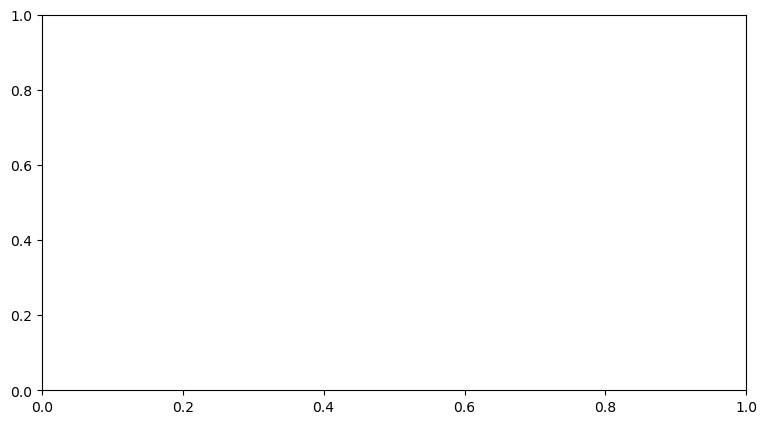

In [40]:

categorical_vars = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))
plt.subplots_adjust(hspace=0.8)
for i in enumerate(categorical_vars):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
    plt.xticks(rotation = 45)
    # Further analysis has been done to consider each TARGET 0 and TARGET 1 as separate datasets

### Analysis and Charts after separating the population into TARGET 0 and TARGET 1



In [17]:
NotprobDefaulter=df.loc[df["TARGET"]==0]
probDefaulter=df.loc[df["TARGET"]==1]

### ProbableDefaulter has TARGET = 1 and NotProbableDefaulter = 0

In [18]:
# GENERIC FUNCTION TO PLOT CHARTS - BAR CHARTS WITH COUNTS

def countbar_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,5))
    
    s1=sns.countplot(ax=ax1,x=probDefaulter[var], data=probDefaulter, order= probDefaulter[var].value_counts().index,)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel(" Count of Probable Defaulters")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=NotprobDefaulter[var], data=NotprobDefaulter, order= NotprobDefaulter[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Probable Non-Defaulters")
    plt.show()


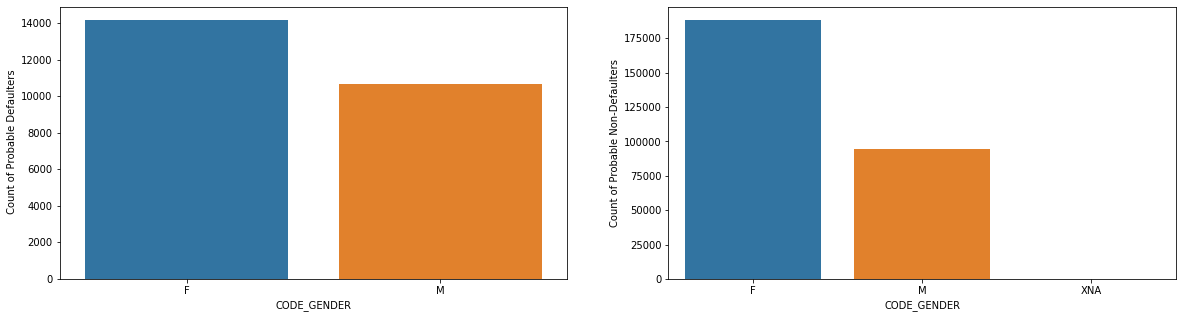

In [19]:
# To understand Count of Loans are spread across GENDERS
countbar_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)
#XNA is a very neglible number hence left as it is


##### Insight: Females Counts in Both Defaulter and Non-Defaulter (Probable) in Application Data is GREATER than Males

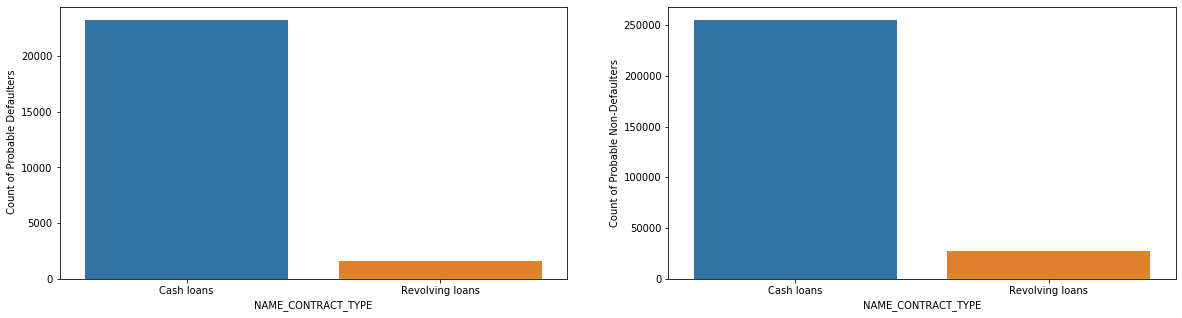

In [20]:
countbar_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)


###### Insight - Cash Loans are applied for MORE than Revolving Loan by Loan Applicants. They also are DEFAULTED more hence

In [21]:
# The intent is to convert columns which have 2 unique values. Analyzing the Flags
binary_column=list(application_missing[(application_missing.Unique==2)&(application_missing.Data_Type=="int64")].index)
def binary_to_category(df, cols_to_convert):
    for y in binary_column:
        df.loc[:,y].replace((0, 1), ('No', 'Yes'), inplace=True)
    return df


In [22]:
#calling the function for application_data
binary_to_category(df, binary_column)

,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,0.083037,0.0000,0.0000,0.0000,0.00,0.00,0.0000,"Stone, brick",0.0250,0.0247,...,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,0.311267,0.0000,0.0098,0.0100,0.08,0.08,0.0806,Block,0.0968,0.0959,...,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.145570,0.0125,0.1095,0.1118,0.22,0.22,0.0806,"Stone, brick",0.2040,0.2021,...,-1982,-8456.0,-236,-9327,0.032561,With parents,Separated,Secondary / secondary special,Working,456251
307507,NaN,0.0000,0.0000,0.0000,0.00,0.00,0.0000,"Stone, brick",0.0250,0.0247,...,-4090,-4388.0,365243,-20775,0.025164,House / apartment,Widow,Secondary / secondary special,Pensioner,456252
307508,0.744026,0.0000,0.0000,0.0000,0.00,0.00,0.0000,Panel,0.1041,0.1031,...,-5150,-6737.0,-7921,-14966,0.005002,House / apartment,Separated,Higher education,Working,456253
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Stone, brick",0.0125,0.0124,...,-931,-2562.0,-4786,-11961,0.005313,House / apartment,Married,Secondary / secondary special,Commercial associate,456254


In [23]:
#TARGET Variable viceversa
df.TARGET.replace(('No', 'Yes'), (0, 1), inplace=True)
df.dtypes.value_counts()

object     47
float64    43
int64       9
dtype: int64

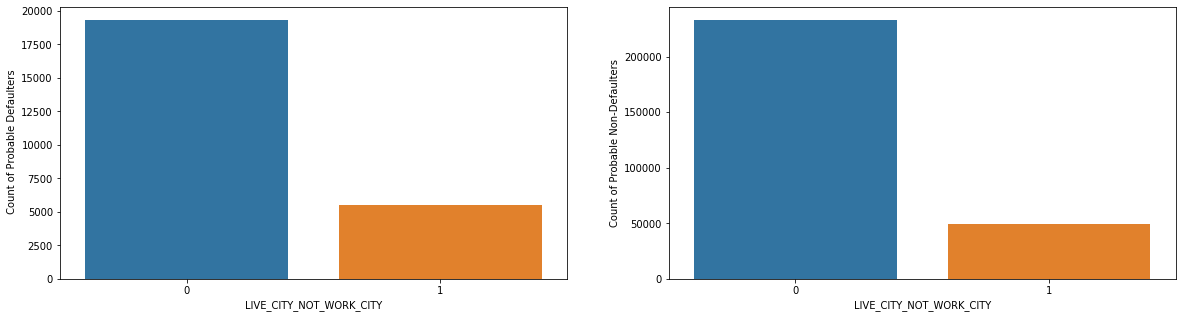

In [24]:

df['LIVE_CITY_NOT_WORK_CITY']=df['LIVE_CITY_NOT_WORK_CITY'].astype(object)
countbar_charts('LIVE_CITY_NOT_WORK_CITY', label_rotation=False,horizontal_layout=True)



###### Insight - Probable Non-Defaulters Have Contact Address SAME as Work Address. Count of Defaulters stating Contact NOT SAME as Work Address is ONLY 5503

In [25]:
df['REG_REGION_NOT_LIVE_REGION']

#Meaning Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

0         No
1         No
2         No
3         No
4         No
          ..
307506    No
307507    No
307508    No
307509    No
307510    No
Name: REG_REGION_NOT_LIVE_REGION, Length: 307511, dtype: object

In [26]:
df['LIVE_CITY_NOT_WORK_CITY']=df['LIVE_CITY_NOT_WORK_CITY'].astype(object)
df['LIVE_CITY_NOT_WORK_CITY'].describe()

count     307511
unique         2
top           No
freq      252296
Name: LIVE_CITY_NOT_WORK_CITY, dtype: object

### Analysis of Various flags regarding Address Information and car/realty ownership provided by applicant

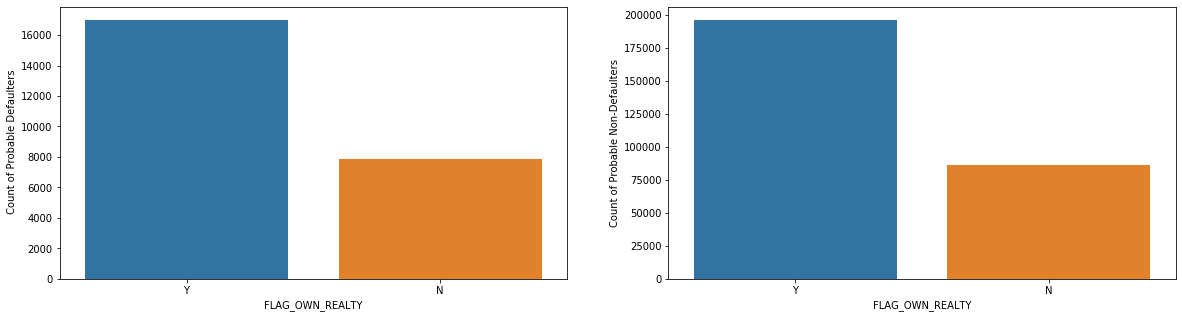

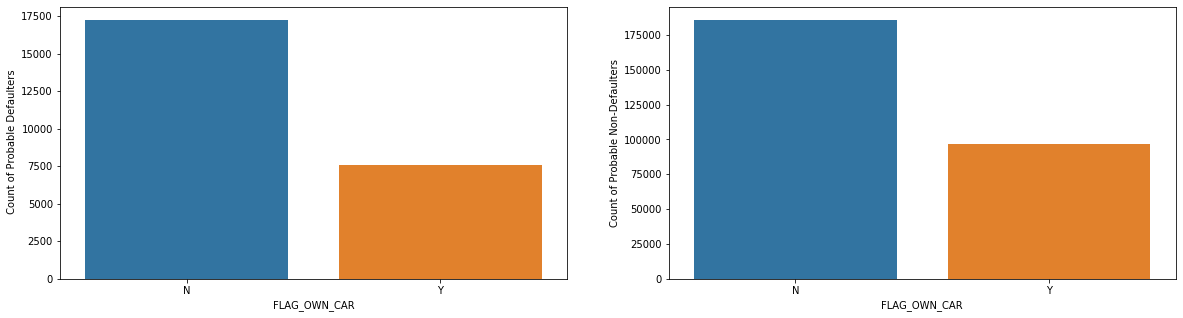

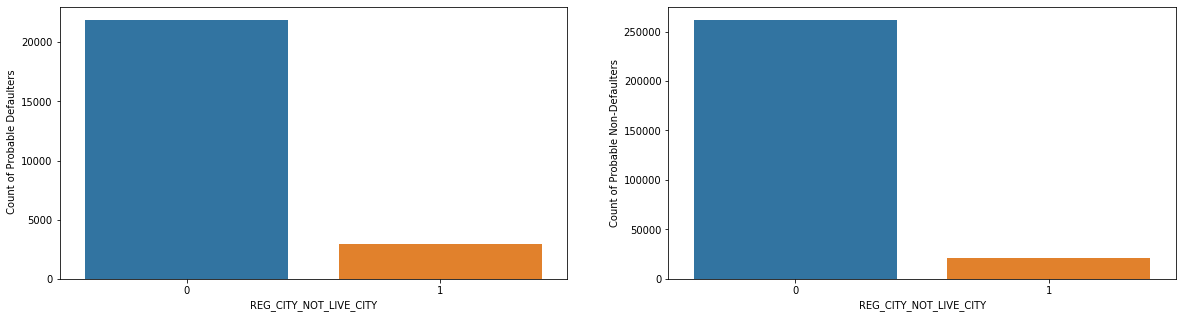

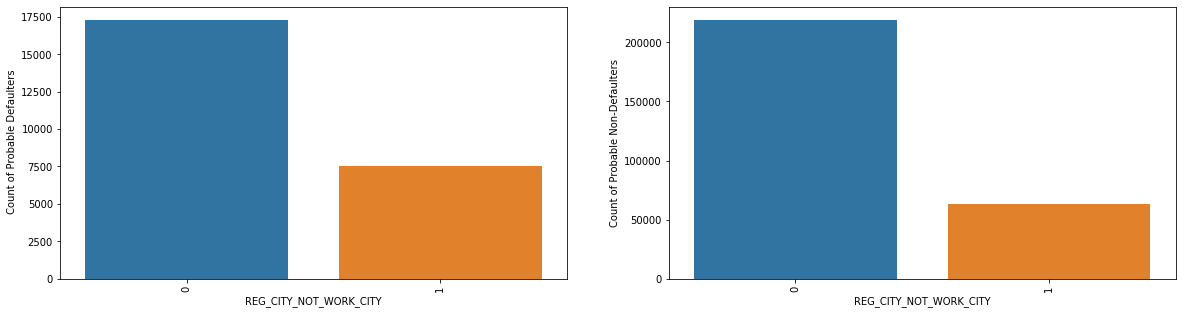

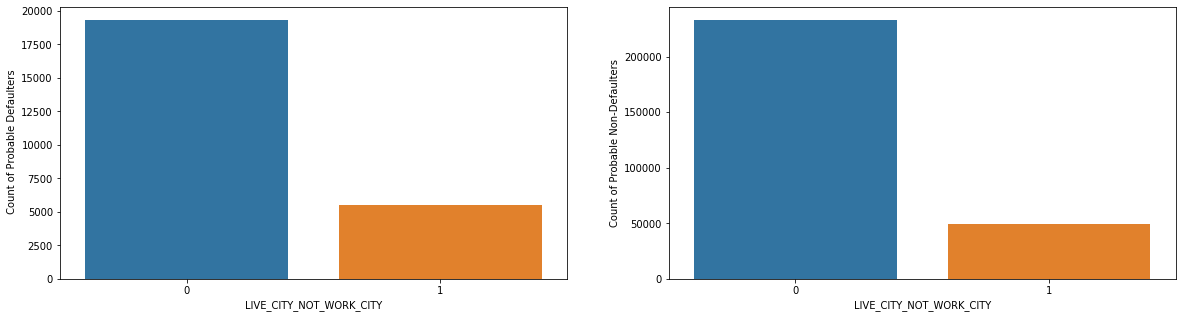

In [27]:
#Spread of  the Defaulters and Non-Defaulters  own Realty
countbar_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)

#Spread of the Defaulters and Non-Defaulters  own a Car
countbar_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

#Spread of  the Defaulters and Non-Defaulters if they live in a City
countbar_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)

#Spread of the Defaulters and Non-Defaulters if they live in the cities they work

countbar_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

#Spread of  the Defaulters and Non-Defaulters if they live in a City as Work City
countbar_charts('LIVE_CITY_NOT_WORK_CITY', label_rotation=False,horizontal_layout=True)



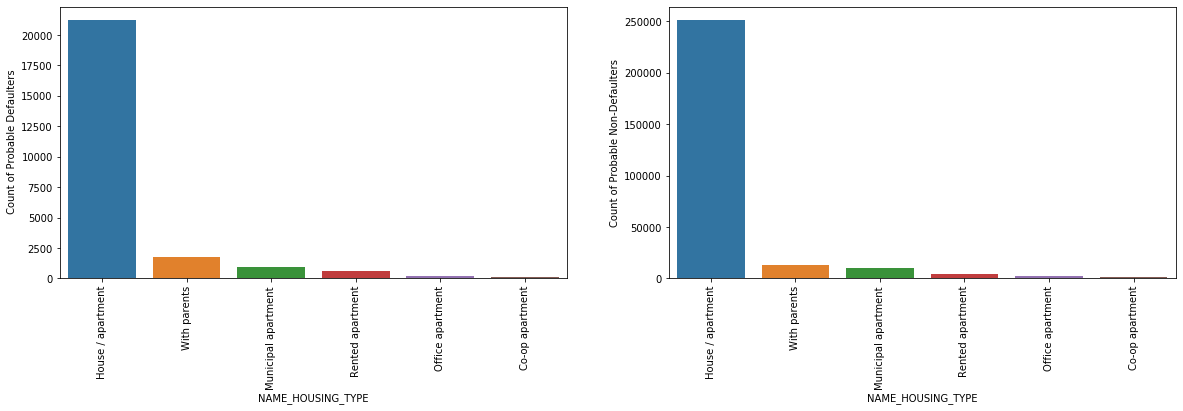

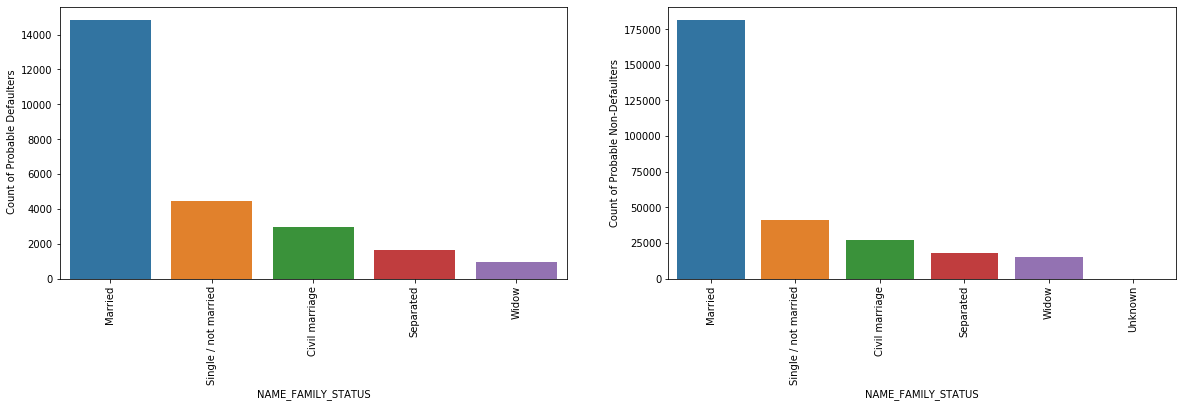

In [28]:
#Spread of the Defaulters and Non-Defaulters based on the House they live
countbar_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

#Spread of the Defaulters and Non-Defaulters based on their family status
countbar_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

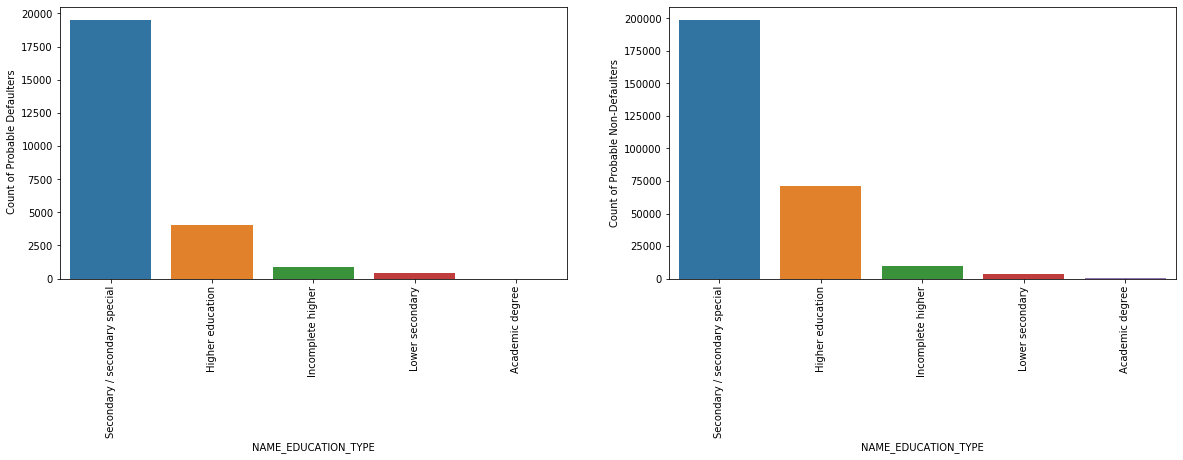

In [29]:
#Spread of the Defaulters and Non-Defaulters based on their education type
countbar_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)



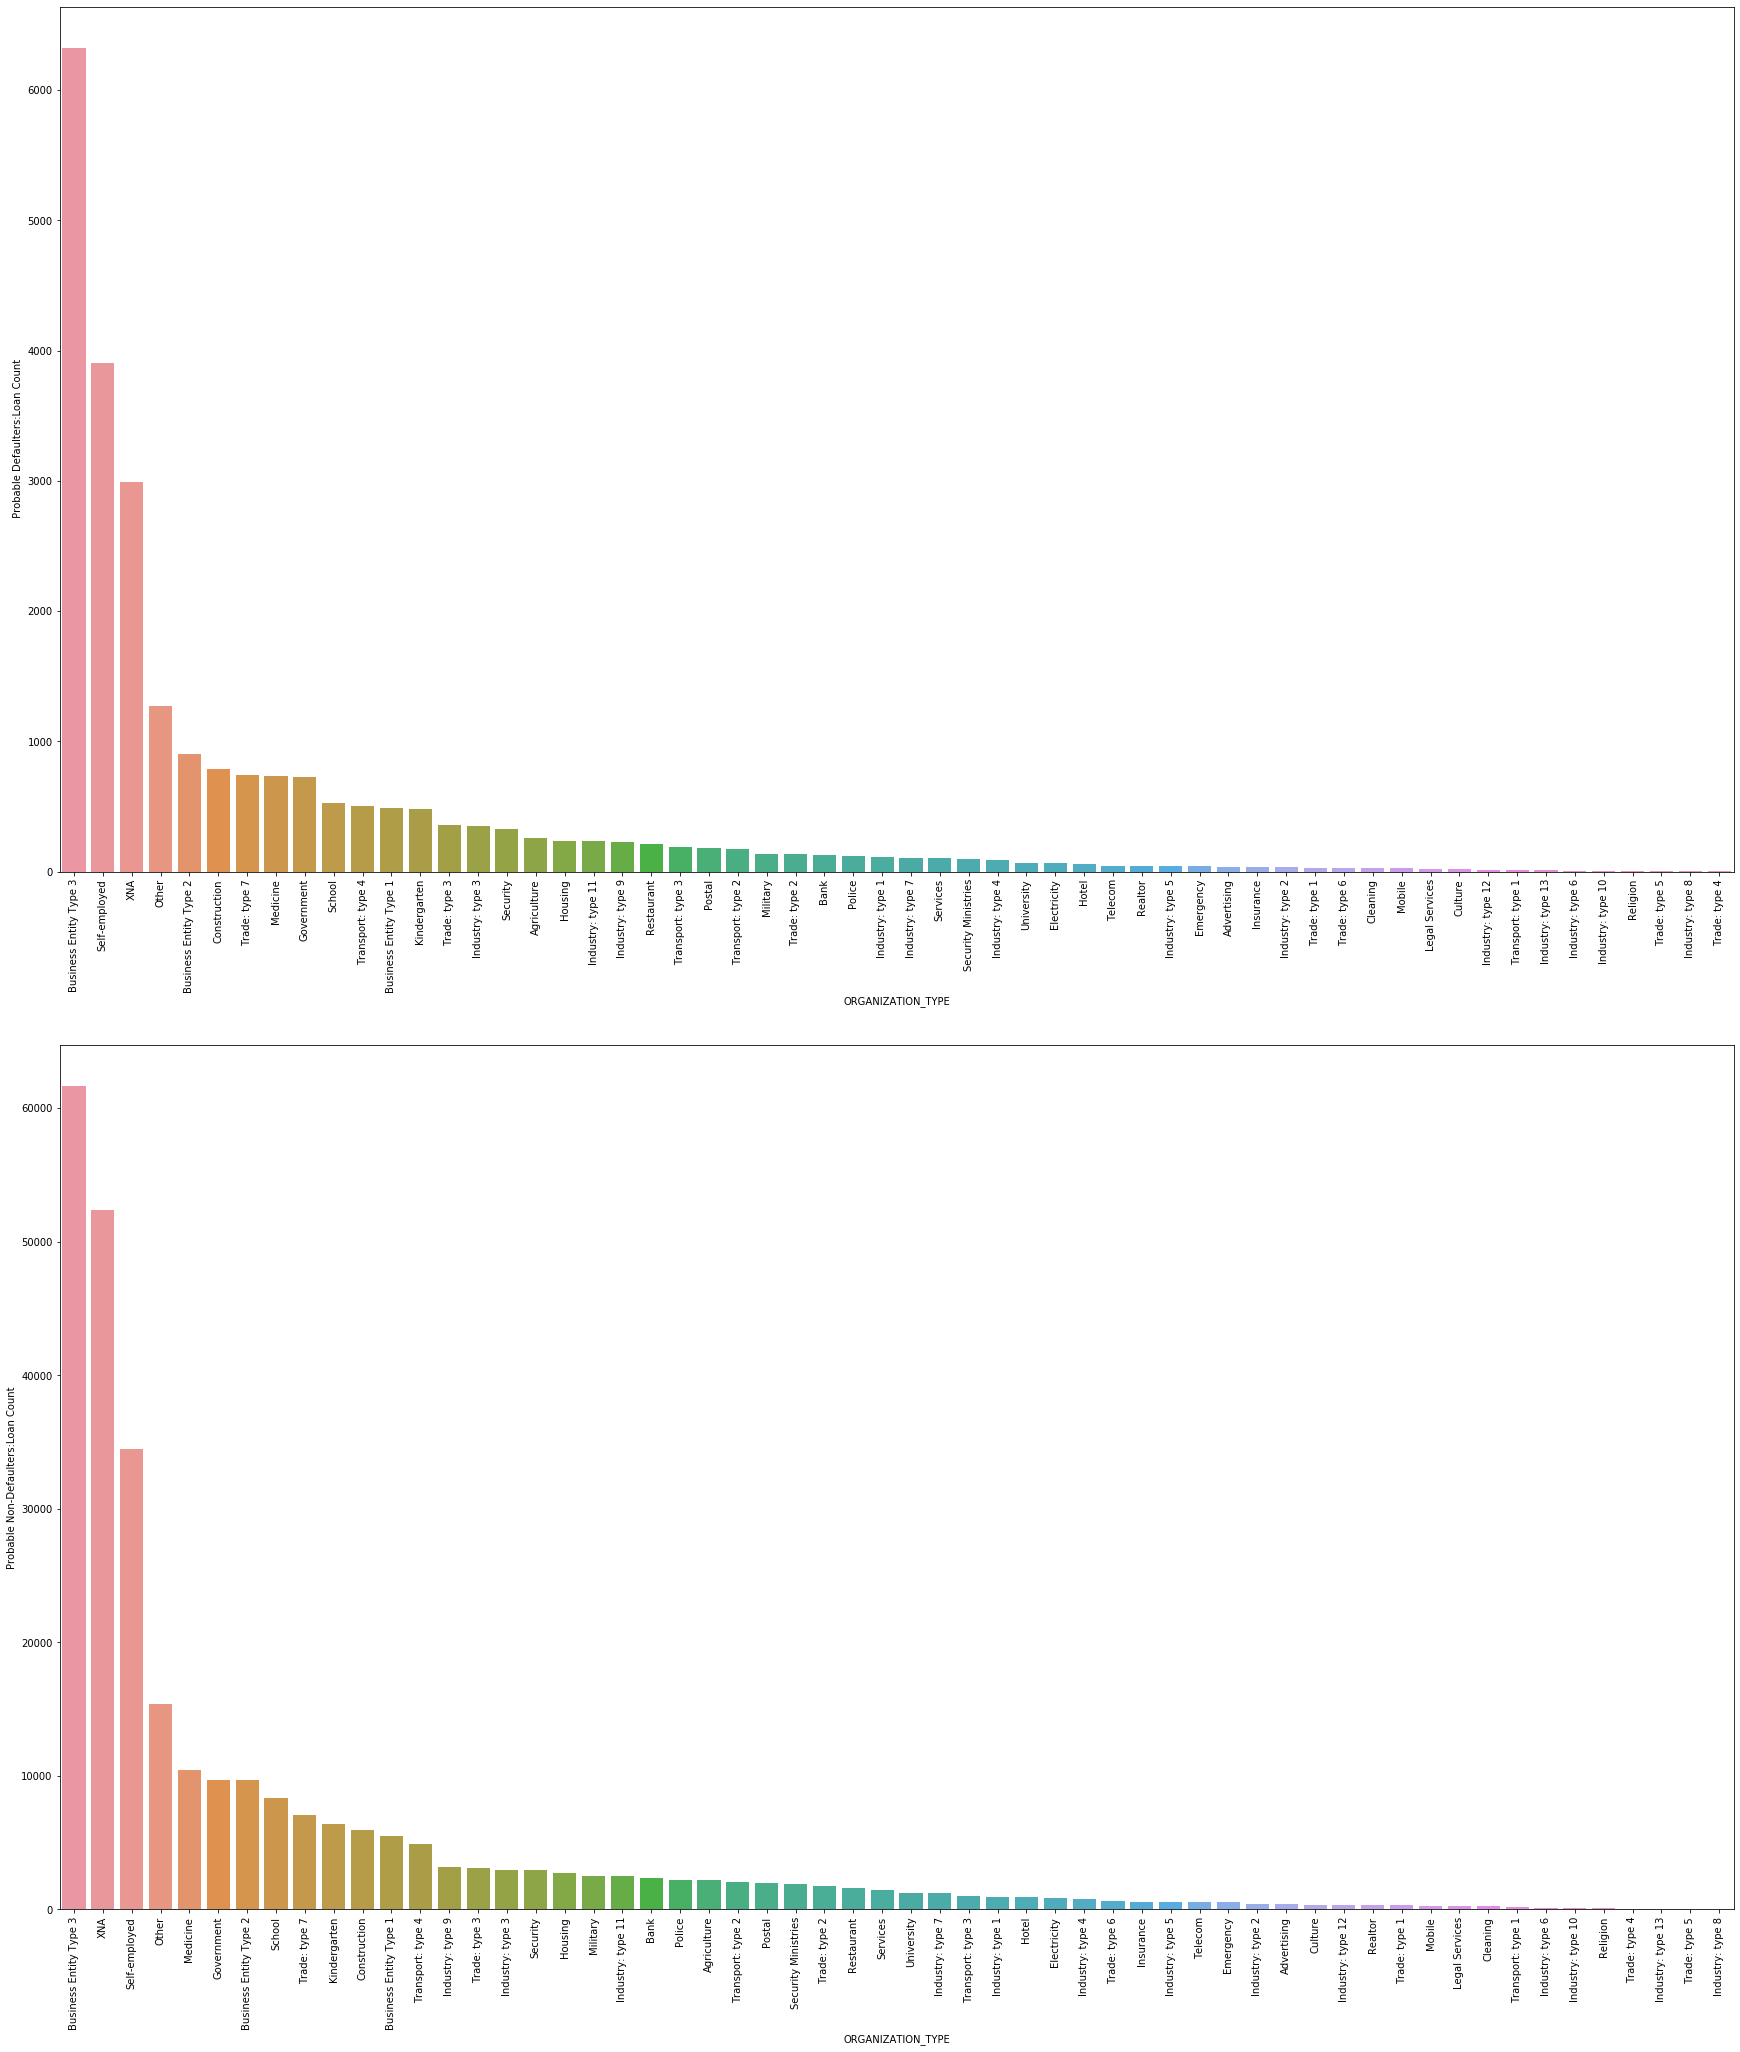

In [30]:
#Spread of the Defaulters and Non-Defaulters based on their Organization Type
## FUNCTION TO PLOT CHARTS. This function is leveraged from one of the Python based Code Sharing Sites
#Recalling the same function in order to change Fig Size

def countbar_charts1(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30,45))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(30,35))

    s1=sns.countplot(ax=ax1,x=probDefaulter[var], data=probDefaulter, order= probDefaulter[var].value_counts().index,)
    ax1.set_xlabel('%s' %var)
    #ax1.set_xlabel("Gender")
    ax1.set_ylabel(" Probable Defaulters:Loan Count")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=NotprobDefaulter[var], data=NotprobDefaulter, order= NotprobDefaulter[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    #ax2.set_xlabel("Gender")
    ax2.set_ylabel("Probable Non-Defaulters:Loan Count")
    plt.show()
countbar_charts1('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)


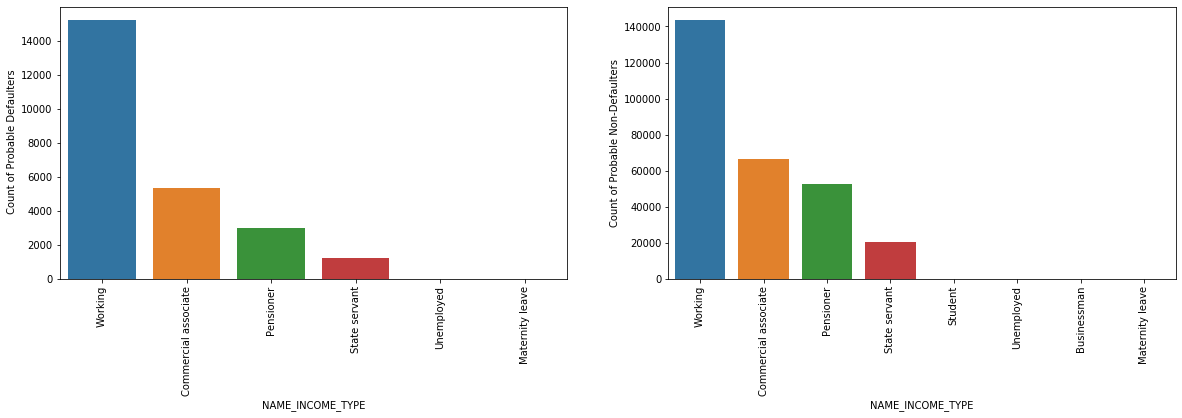

In [31]:

#Spread of the Defaulters and Non-Defaulters based on their Income Type
countbar_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)



In [32]:
#Spread of the Defaulters and Non-Defaulters based on their Occupation Type
df['OCCUPATION_TYPE'].describe()


count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [33]:
NotprobDefaulter=df.loc[df["TARGET"]==0]
probDefaulter=df.loc[df["TARGET"]==1]

In [34]:
#Doing a missing analysis in Occupation Type and replacing it with MODE 
occ_mode=df.OCCUPATION_TYPE.mode()[0]
occ_mode

'Laborers'

In [35]:
df.OCCUPATION_TYPE .value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [36]:
df['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)
df['OCCUPATION_TYPE'].isnull().sum()/len(df)*100 # Check if there are missing values



0.0

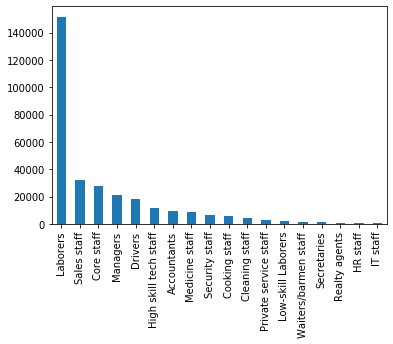

In [37]:
df['OCCUPATION_TYPE'].value_counts().plot(kind='bar')


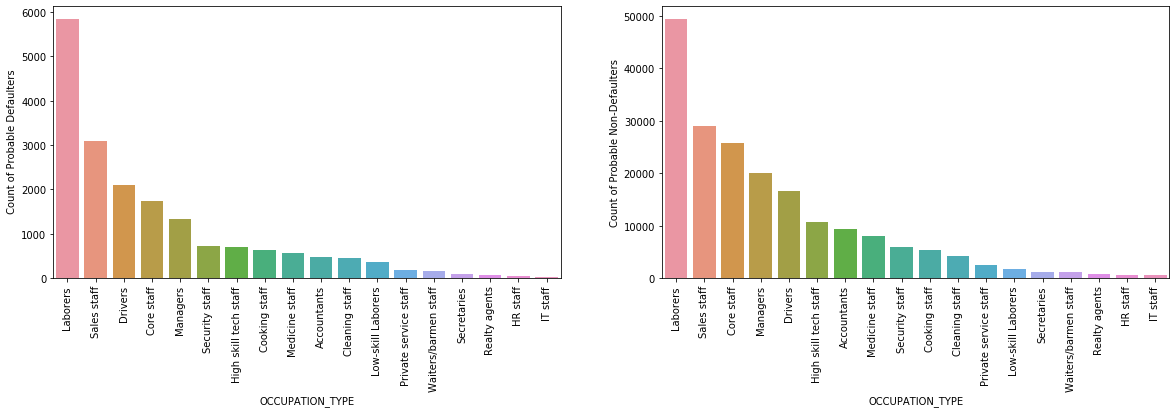

In [38]:
countbar_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

In [39]:
# Handling Outliers 
# Looking at Continuous Variables - Amounts
# Binning them to understand the variables
#Major approaches to the treat outliers:
#Imputation
#Deletion of outliers
#Binning of values
#Cap the outlier

In [40]:
#describe the AMT_ANNUITY variable of df
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

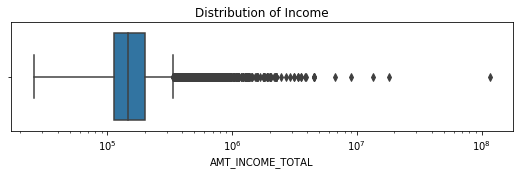

In [41]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

In [42]:
df.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [43]:
#describe the AMT_ANNUITY variable of df

df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

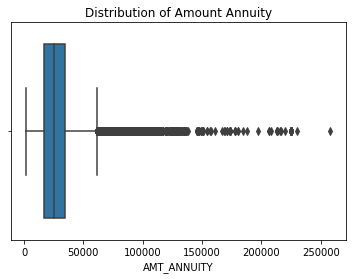

In [44]:
sns.boxplot(df.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

In [45]:
df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

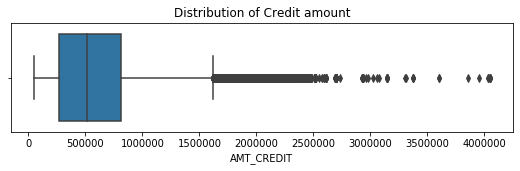

In [46]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [47]:
df.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [48]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

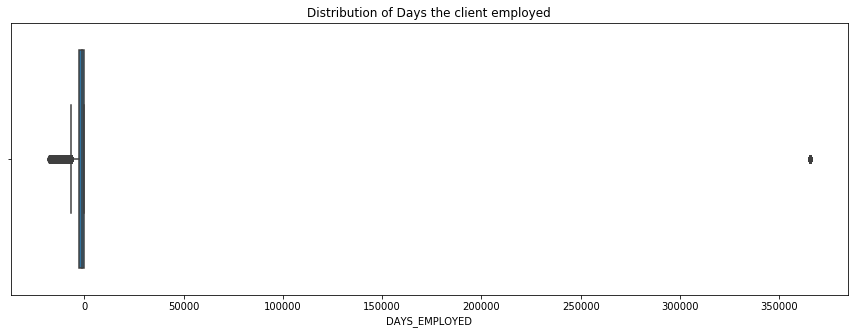

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(df.DAYS_EMPLOYED)
#plt.yscale('log')
plt.title('Distribution of Days the client employed')

plt.show()

###### Creating BINS for Continuous Variable

In [50]:
# Creating bins for income amount
bins = [0,200000,400000,10000000000]
slots = ['Low','Medium','High']
df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slots)
probDefaulter['AMT_INCOME_RANGE']=pd.cut(probDefaulter['AMT_INCOME_TOTAL'],bins,labels=slots)
NotprobDefaulter['AMT_INCOME_RANGE']=pd.cut(NotprobDefaulter['AMT_INCOME_TOTAL'],bins,labels=slots)


C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


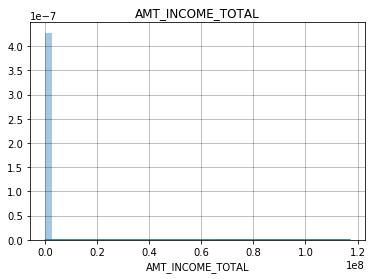

In [51]:
#Analyse continuous column with respect to the target column
sns.distplot(probDefaulter['AMT_INCOME_TOTAL'], hist = True, label="Probable Defaulters")# Target = 0
plt.title('AMT_INCOME_TOTAL')
plt.grid(color='black', linestyle='-',linewidth=0.50, alpha=0.5) 
plt.show()

In [52]:
probDefaulter.AMT_INCOME_TOTAL.max()

117000000.0

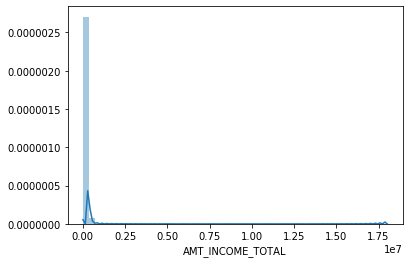

In [53]:
sns.distplot(NotprobDefaulter['AMT_INCOME_TOTAL'], hist = True, label='Bad')

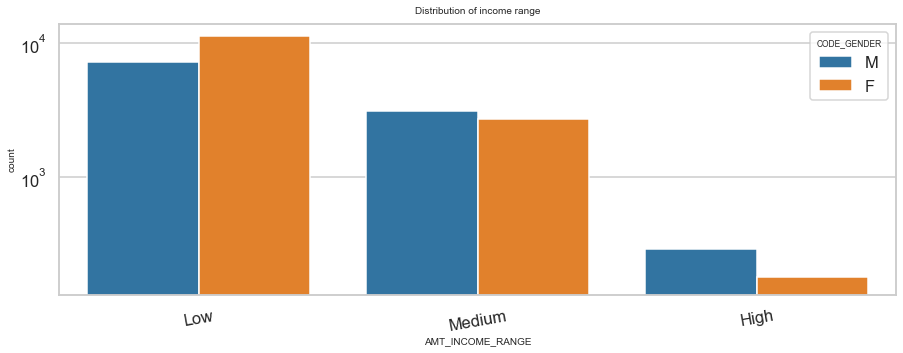

In [54]:
# This Function helps plot Bar Charts for Categorical Vars
def binnedplot(df,col,title,hue =None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['axes.titlepad'] = 10
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 10 + 2*len(temp.unique())
    fig.set_size_inches(width , 5)
    plt.xticks(rotation=10)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    plt.show()
binnedplot(probDefaulter,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


###### Insight : In the defaulter population Low Income Bucket with Female Population higher than Male for each of the buckets

In [55]:
probDefaulter['DAYS_BIRTH'] = abs(probDefaulter['DAYS_BIRTH'])
probDefaulter['AGE'] = probDefaulter['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
age_buckets = ['0-20','20-30','30-40','40-50','50 above']
probDefaulter['AGE_GROUP']=pd.cut(probDefaulter['AGE'],bins=bins,labels=age_buckets)
probDefaulter.AGE_GROUP.value_counts()

C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

30-40       7719
20-30       6019
40-50       5618
50 above    5469
0-20           0
Name: AGE_GROUP, dtype: int64

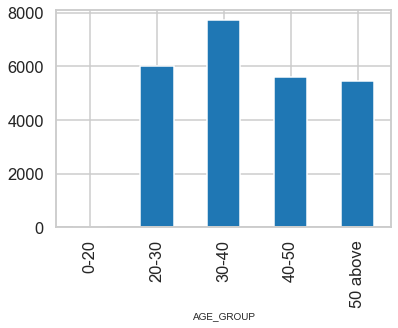

In [56]:
probDefaulter=probDefaulter.groupby(['AGE_GROUP'])['SK_ID_CURR'].count().plot.bar()


######  Insight :In the Probable Defaulter Population - Highest Population is of 30-40 Age Group, followed by 20-30, 40-50 and finally 50 above

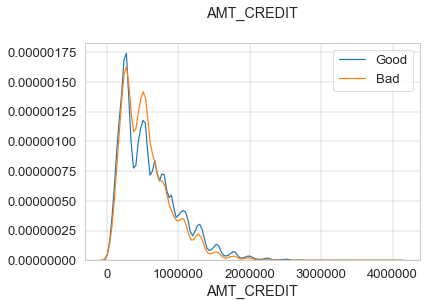

In [66]:
# Creating bins for credit amount
#Analyse continuous column with respect to the target column
df1= pd.read_csv("application_data.csv")
NotprobDefaulter1=df1.loc[df1["TARGET"]==0]
probDefaulter1=df1.loc[df1["TARGET"]==1]
sns.distplot(NotprobDefaulter1['AMT_CREDIT'], hist = False, label="Good")
sns.distplot(probDefaulter1['AMT_CREDIT'], hist = False, label='Bad')
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

In [67]:
bins = [0,1000000,2000000,3000000,4000000]
slots = ['Low','Medium','High', 'Very High']
df1['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins,labels=slots)
probDefaulter1['AMT_CREDIT_RANGE']=pd.cut(probDefaulter1['AMT_CREDIT'],bins,labels=slots)
NotprobDefaulter1['AMT_CREDIT_RANGE']=pd.cut(NotprobDefaulter1['AMT_CREDIT'],bins,labels=slots)

C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


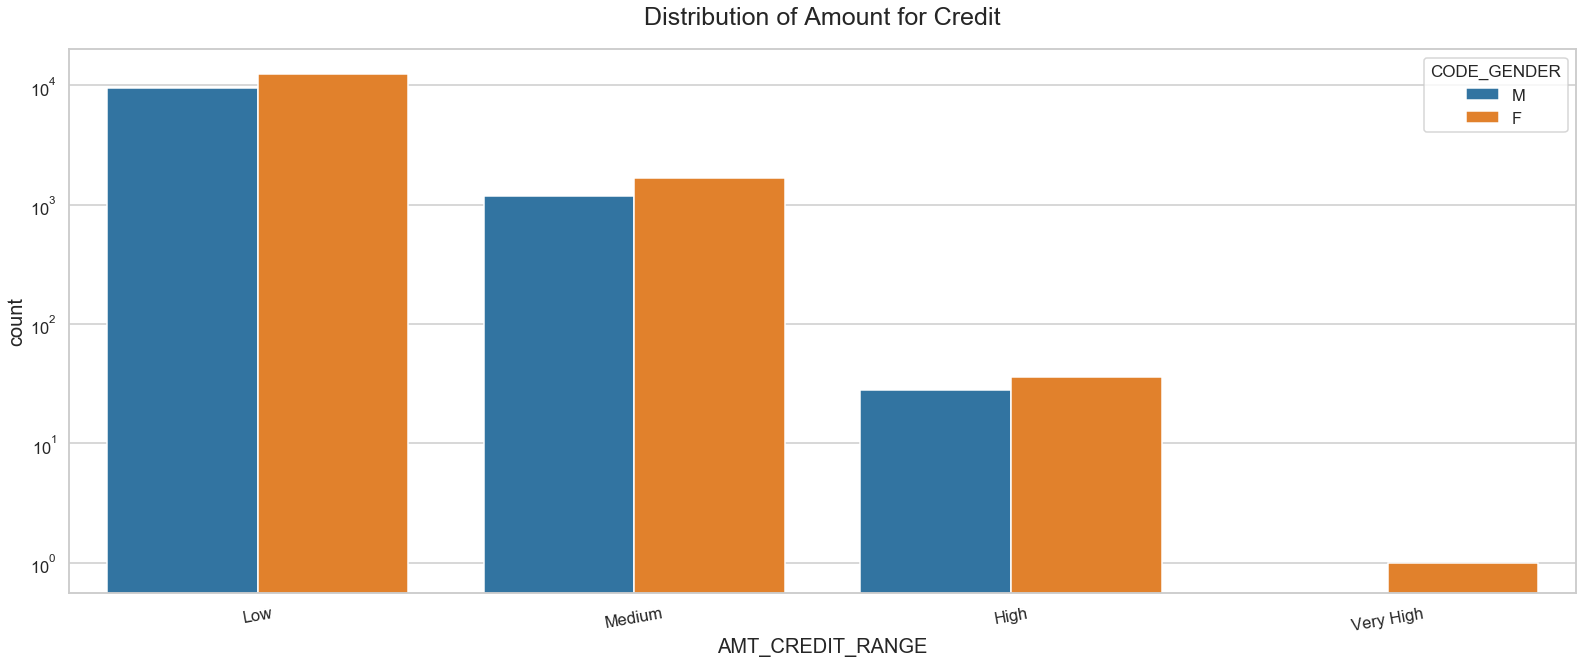

In [68]:
binnedplot(probDefaulter1,col='AMT_CREDIT_RANGE',title='Distribution of Amount for Credit',hue='CODE_GENDER')


######  Insight :In the Probable Defaulter Population -Low Credit Amounts for Females see higher count of defaults versus other buckets

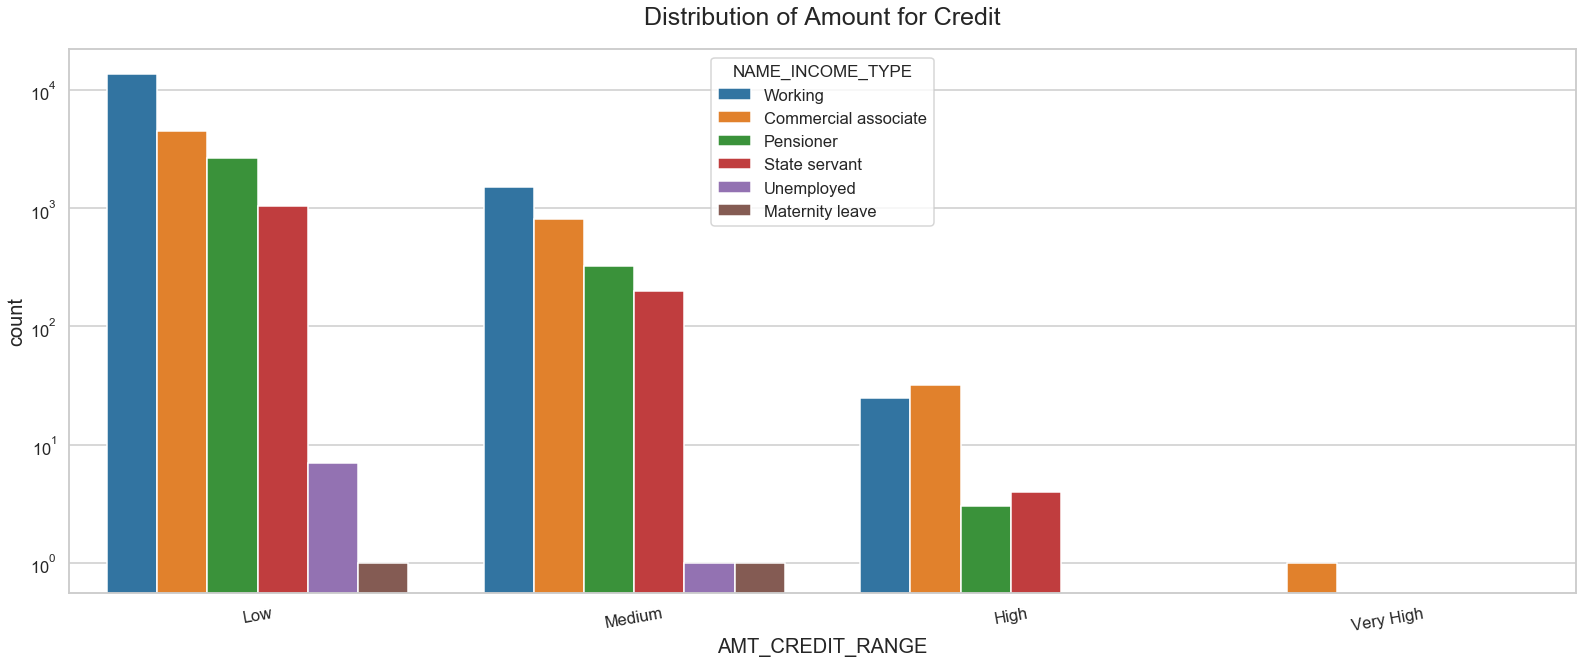

In [69]:
def binnedplot(df,col,title,hue =None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 25
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 20 + 2*len(temp.unique())
    fig.set_size_inches(width , 10)
    plt.xticks(rotation=10)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    plt.show()
binnedplot(probDefaulter1,col='AMT_CREDIT_RANGE',title='Distribution of Amount for Credit',hue='NAME_INCOME_TYPE')


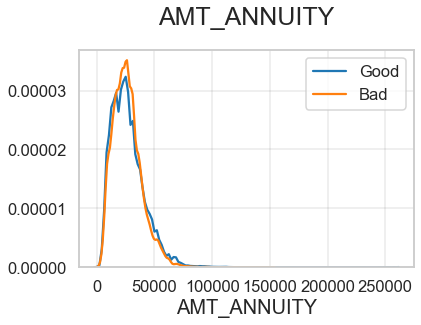

In [70]:
#Analyse continuous column with respect to the target column
sns.distplot(NotprobDefaulter1['AMT_ANNUITY'], hist = False, label="Good")
sns.distplot(probDefaulter1['AMT_ANNUITY'], hist = False, label='Bad')
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


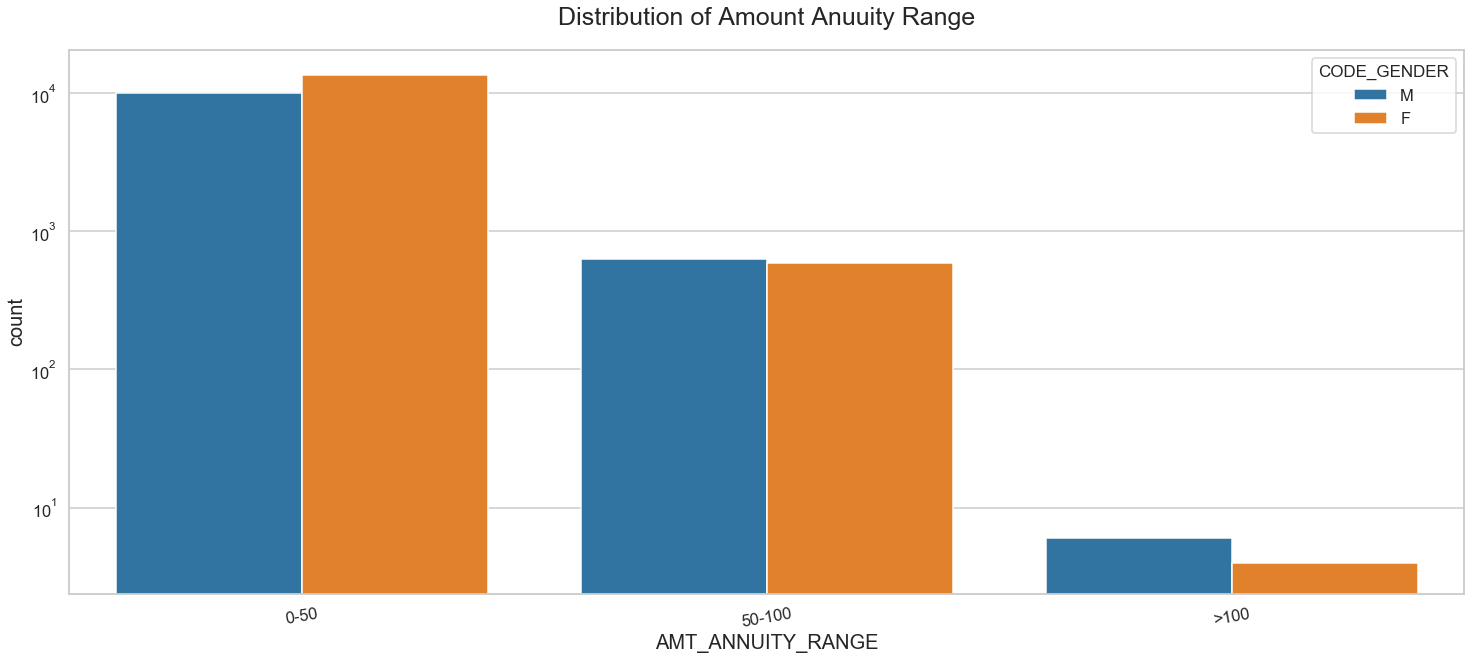

In [71]:
#binnedplot(probDefaulter,col='AMT_ANNUITY',title='Distribution of Amount Annuity',hue='CODE_GENDER')
bins = [0,50000,100000,250000]
slots = ['0-50','50-100','>100']
df['AMT_ANNUITY_RANGE']=pd.cut(df['AMT_ANNUITY'],bins,labels=slots)
probDefaulter1['AMT_ANNUITY_RANGE']=pd.cut(probDefaulter1['AMT_ANNUITY'],bins,labels=slots)
NotprobDefaulter1['AMT_ANNUITY_RANGE']=pd.cut(NotprobDefaulter1['AMT_ANNUITY'],bins,labels=slots)
binnedplot(probDefaulter1,col='AMT_ANNUITY_RANGE',title='Distribution of Amount Anuuity Range',hue='CODE_GENDER')


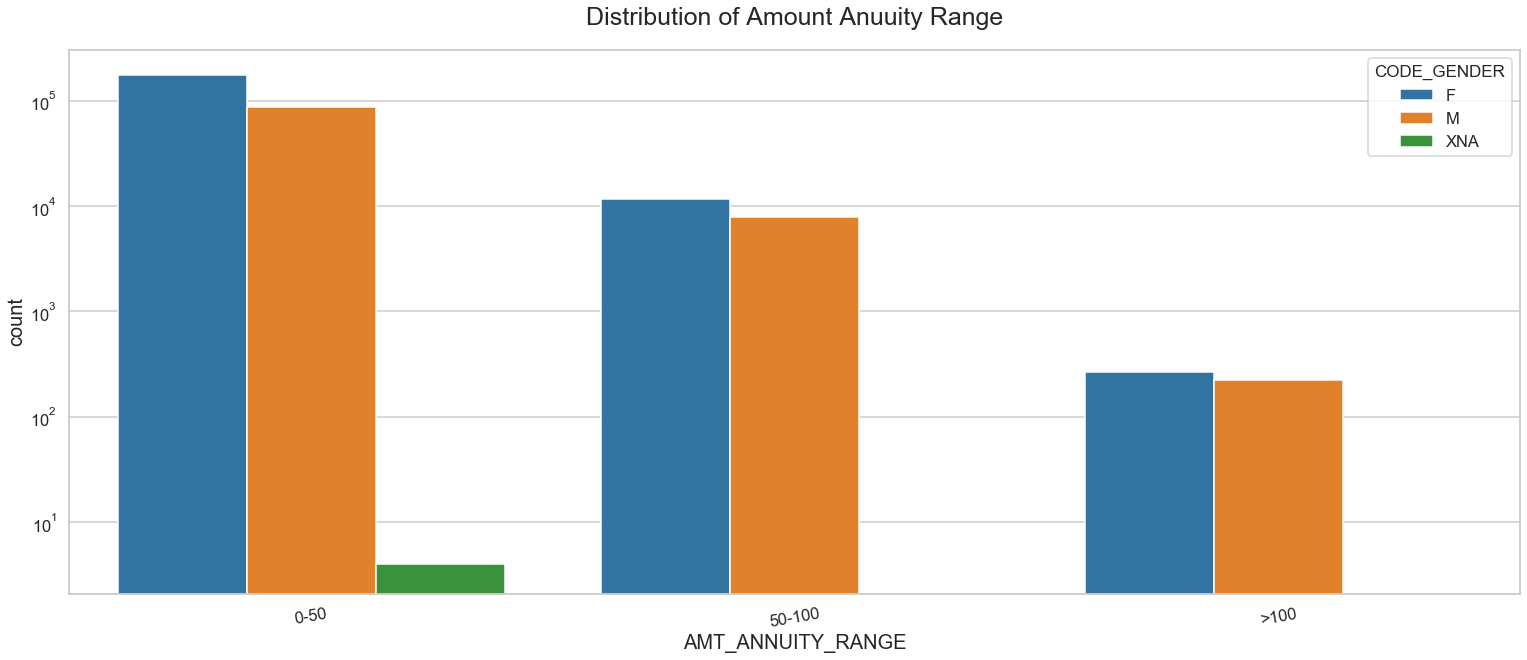

In [72]:
binnedplot(NotprobDefaulter1,col='AMT_ANNUITY_RANGE',title='Distribution of Amount Anuuity Range',hue='CODE_GENDER')


In [73]:
df1['TARGET'].value_counts()/len(df['TARGET']) *100


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

# 8% are Probable Defaulters while rest 91-92% have Probable Non-Defaulters

# Bi-variate Analysis - Subplot

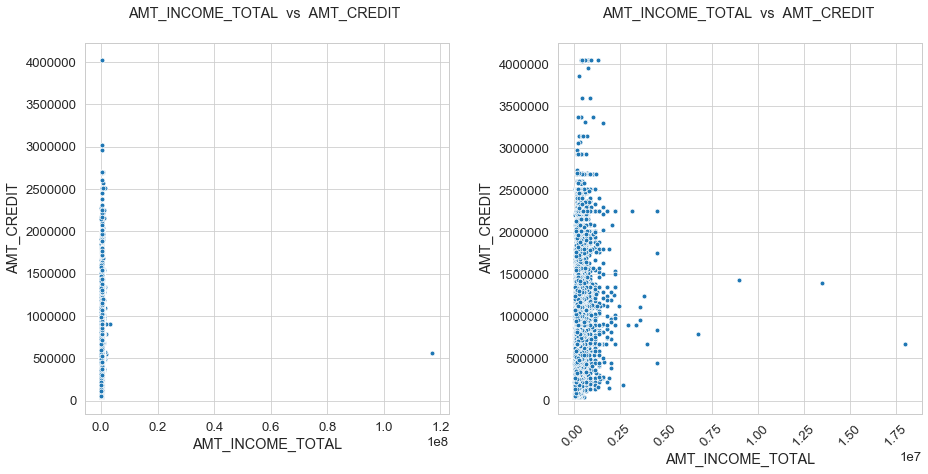

In [74]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace=0.3)
sns.set_context("paper", font_scale=1.5) 
plt.subplot(2,2,1)
sns.scatterplot(probDefaulter1.AMT_INCOME_TOTAL,probDefaulter1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(NotprobDefaulter1.AMT_INCOME_TOTAL,NotprobDefaulter1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

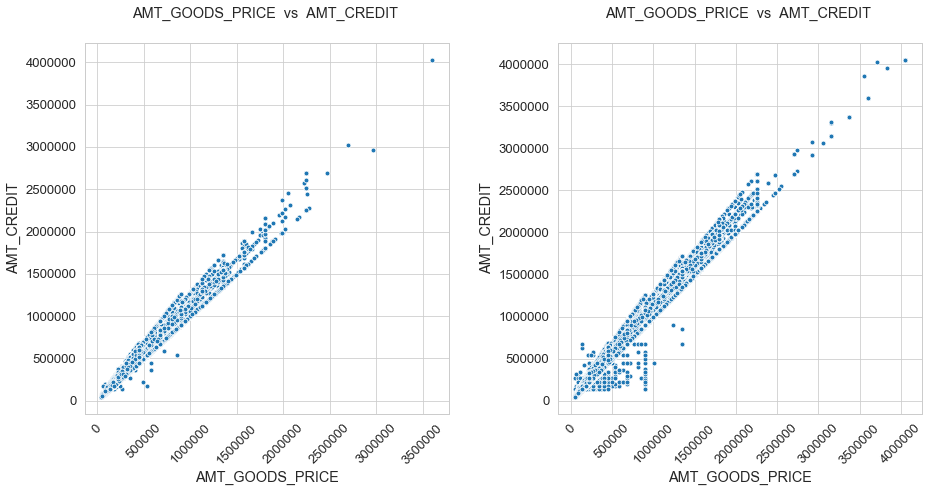

In [75]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,3)
sns.set_context("paper", font_scale=1.5) 
sns.scatterplot(probDefaulter1.AMT_GOODS_PRICE,probDefaulter1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.subplot(2,2,4)
sns.scatterplot(NotprobDefaulter1.AMT_GOODS_PRICE,NotprobDefaulter1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

In [76]:
probDefaulter2=df1.loc[df1["TARGET"]==1]
NotprobDefaulter2=df1.loc[df1["TARGET"]==0]

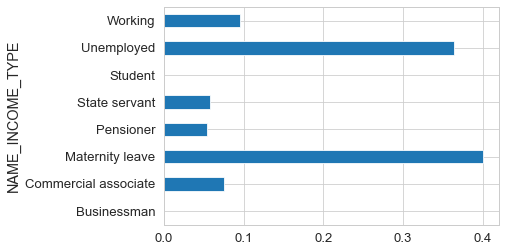

In [77]:
df1.groupby(['NAME_INCOME_TYPE']) ['TARGET'].mean().plot.barh()
plt.show()

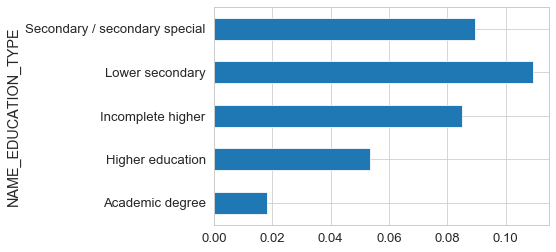

In [78]:
df1.groupby(['NAME_EDUCATION_TYPE']) ['TARGET'].mean().plot.barh()
plt.show()

# BIVARIATE ANALYSIS through BOX PLOT

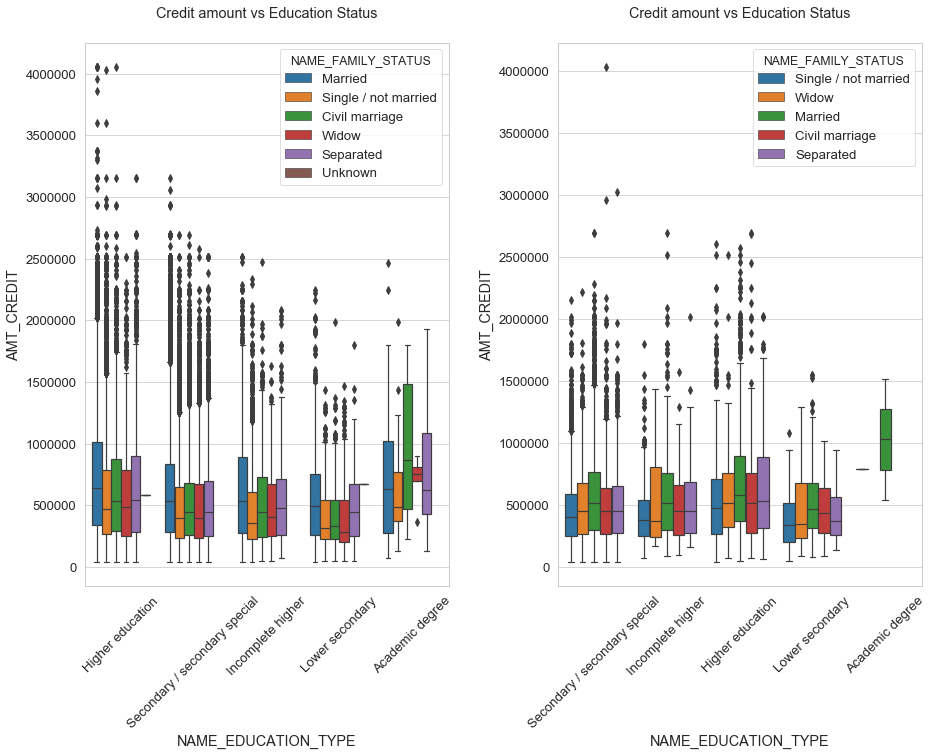

In [79]:


plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data = NotprobDefaulter2, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data = probDefaulter2, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()


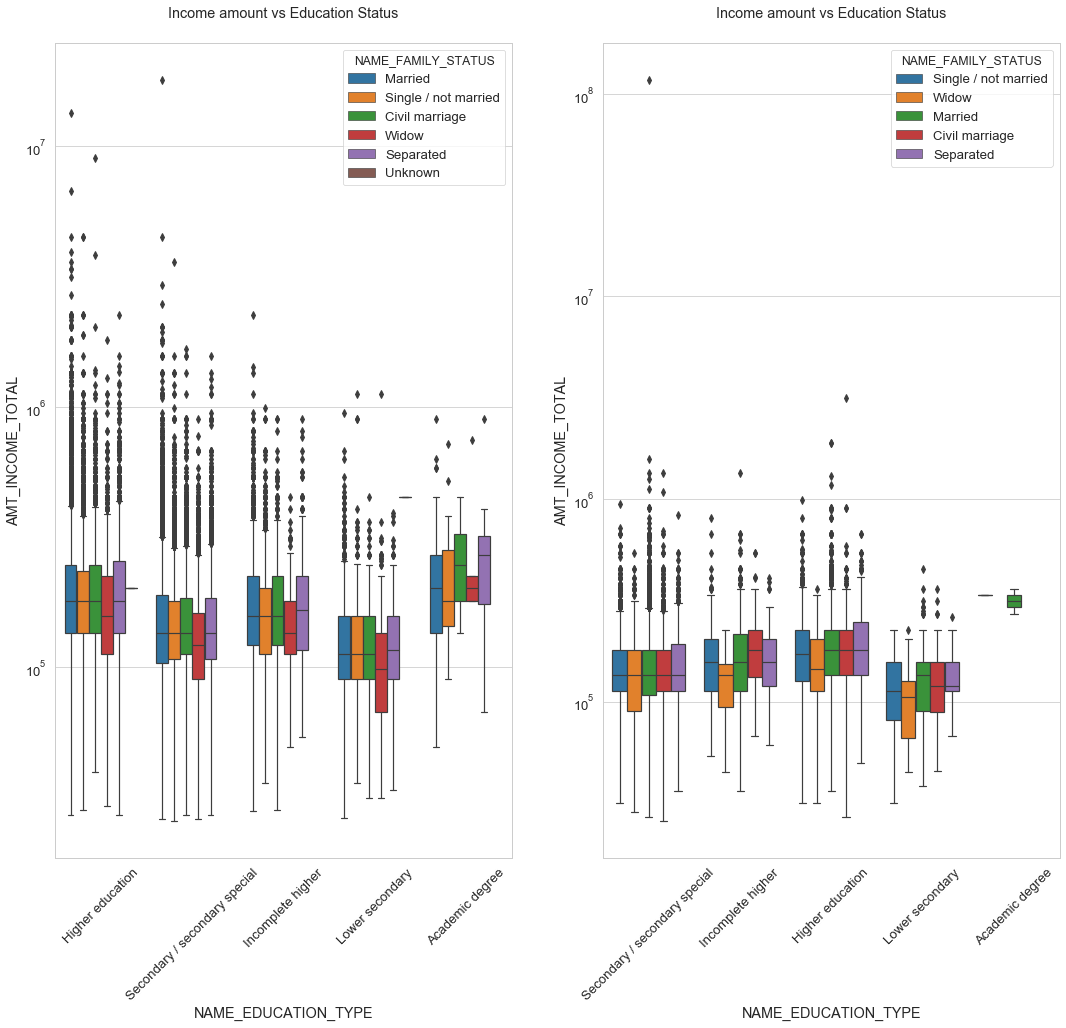

In [80]:


plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data = NotprobDefaulter2, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Income amount vs Education Status')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data = probDefaulter2, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Income amount vs Education Status')
plt.xticks(rotation=45)
plt.show()
#AMT_ANNUITY

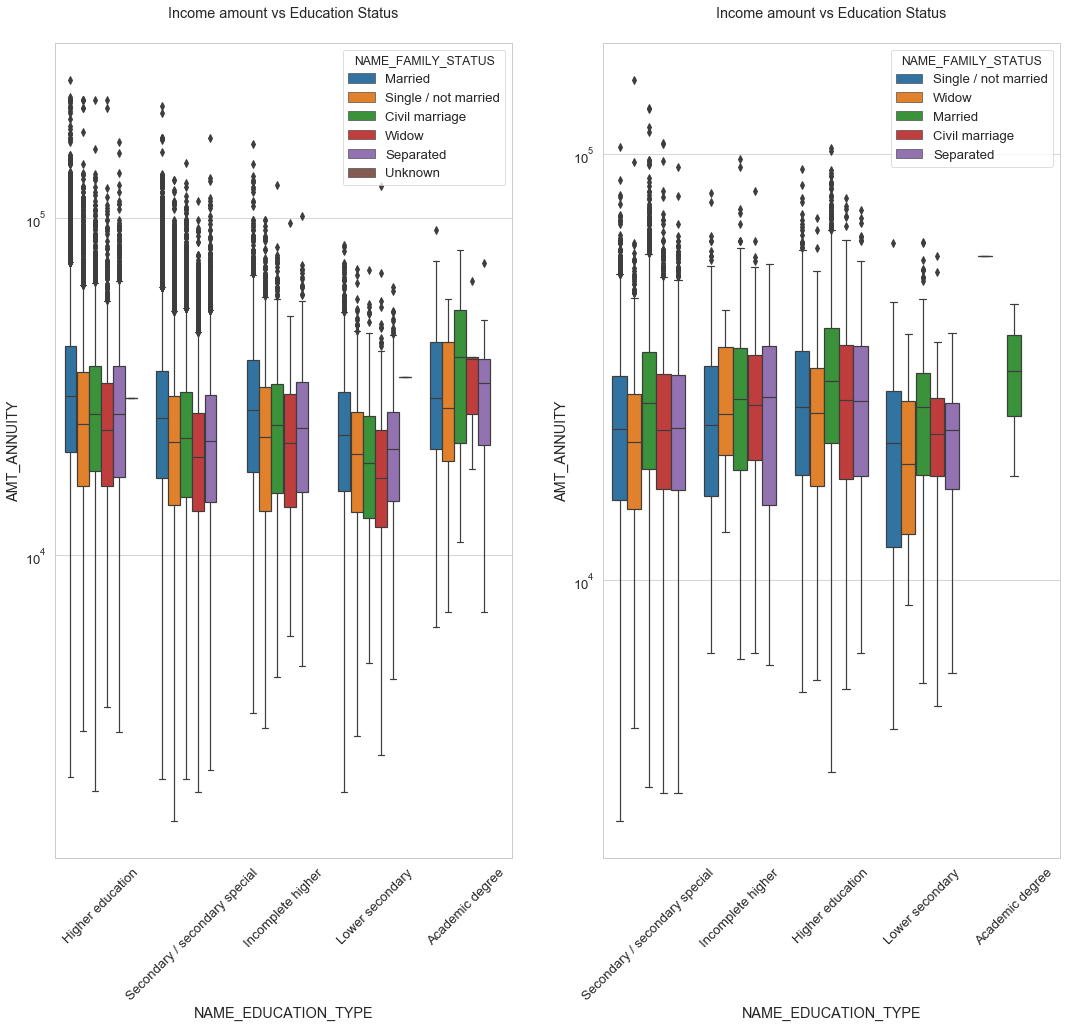

In [81]:
plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data = NotprobDefaulter2, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Income amount vs Education Status')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data = probDefaulter2, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Income amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

# Multivariate Analysis Heatmaps and Bucketing of Continuous Variables

In [ ]:
# Multivariate analysis has been done at end with Merged Data Set

# Correlation matrix for all numerical columns - Probable Defaulter Set

In [82]:
corr=probDefaulter2.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.001254,-0.005151,...,-0.009181,-0.006382,0.003781,0.006932,-0.012036,-0.007954,-0.002999,0.006436,-0.000880,0.008916
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,...,0.004333,-0.001370,-0.002395,0.001136,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,...,-0.002177,-0.000371,-0.000450,-0.000647,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,-0.135316,-0.000968,...,0.011174,0.013442,0.016949,-0.021964,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.007954,NaN,-0.013004,-0.000272,0.003008,-0.000294,0.004280,-0.005483,-0.007248,0.021363,...,0.005703,-0.001744,-0.001896,-0.001822,0.246741,1.000000,0.184098,-0.012627,0.000789,0.001239
AMT_REQ_CREDIT_BUREAU_WEEK,-0.002999,NaN,-0.011792,0.000018,0.007650,0.031242,0.007980,0.002904,-0.005537,0.014720,...,-0.007416,-0.003964,-0.004310,-0.004141,0.006232,0.184098,1.000000,-0.011994,-0.010151,0.016838
AMT_REQ_CREDIT_BUREAU_MON,0.006436,NaN,-0.012583,0.004114,0.055038,0.053413,0.058558,0.071329,-0.005713,-0.025738,...,0.012550,-0.007082,0.000096,-0.007397,-0.007871,-0.012627,-0.011994,1.000000,-0.001365,-0.002559
AMT_REQ_CREDIT_BUREAU_QRT,-0.000880,NaN,-0.018174,-0.001133,-0.017467,-0.010205,-0.016024,-0.007299,-0.017214,0.014982,...,-0.004834,-0.002809,0.001868,-0.000373,0.006584,0.000789,-0.010151,-0.001365,1.000000,0.101756


In [83]:
#Convert the diagonal and below diagonal values of matrix to False,
#Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.001254,-0.005151,...,-0.009181,-0.006382,0.003781,0.006932,-0.012036,-0.007954,-0.002999,0.006436,-0.000880,0.008916
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,...,0.004333,-0.001370,-0.002395,0.001136,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,...,-0.002177,-0.000371,-0.000450,-0.000647,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.752195,0.983103,0.069161,-0.135316,-0.000968,...,0.011174,0.013442,0.016949,-0.021964,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.184098,-0.012627,0.000789,0.001239
AMT_REQ_CREDIT_BUREAU_WEEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011994,-0.010151,0.016838
AMT_REQ_CREDIT_BUREAU_MON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001365,-0.002559
AMT_REQ_CREDIT_BUREAU_QRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101756


In [84]:
#convert it to dataframe
corrdf = corr.unstack().reset_index()
corrdf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [85]:
#Changing the names of solumns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [86]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [87]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
1493,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999702
8237,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
6499,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,0.998250
6820,COMMONAREA_MEDI,COMMONAREA_AVG,0.998107
6713,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,0.998100
7676,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,0.998075
7248,FLOORSMIN_MEDI,FLOORSMIN_AVG,0.997825
7462,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,0.997668
7141,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187
7690,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,0.997032


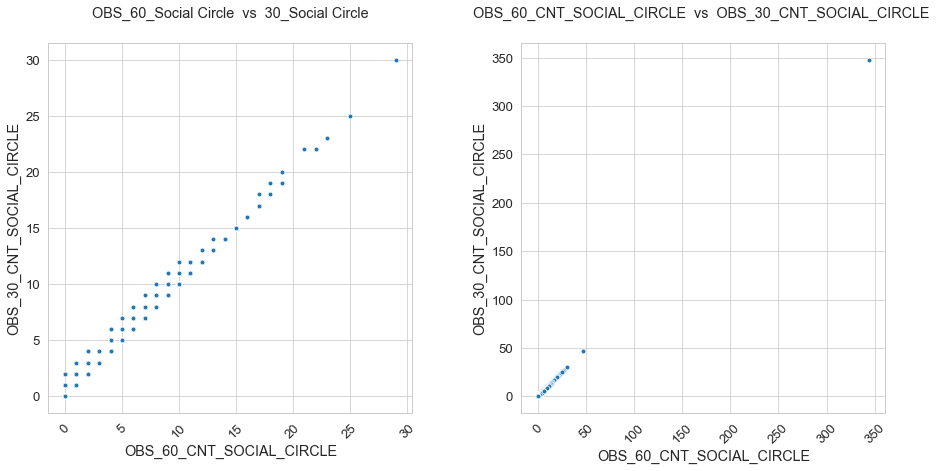

In [89]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,3)
sns.set_context("paper", font_scale=1.5) 
sns.scatterplot(probDefaulter2.OBS_60_CNT_SOCIAL_CIRCLE,probDefaulter2.OBS_30_CNT_SOCIAL_CIRCLE)
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.ylabel('OBS_30_CNT_SOCIAL_CIRCLE')
plt.title('OBS_60_Social Circle  vs  30_Social Circle')
plt.xticks(rotation = 45)
plt.subplot(2,2,4)
sns.scatterplot(NotprobDefaulter2.OBS_60_CNT_SOCIAL_CIRCLE,NotprobDefaulter2.OBS_30_CNT_SOCIAL_CIRCLE)
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.ylabel('OBS_30_CNT_SOCIAL_CIRCLE')
plt.title('OBS_60_CNT_SOCIAL_CIRCLE  vs  OBS_30_CNT_SOCIAL_CIRCLE ')
plt.xticks(rotation = 45)
plt.show()

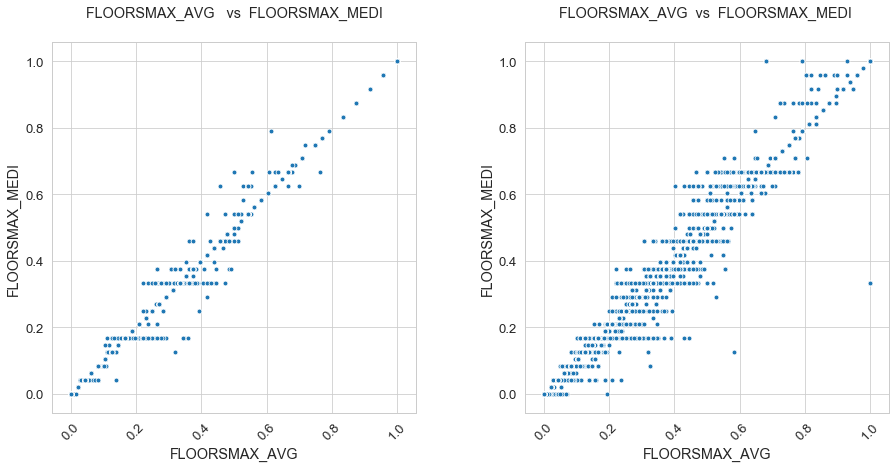

In [90]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,3)
sns.set_context("paper", font_scale=1.5) 
sns.scatterplot(probDefaulter2.FLOORSMAX_AVG,probDefaulter2.FLOORSMAX_MEDI)
plt.xlabel('FLOORSMAX_AVG')
plt.ylabel('FLOORSMAX_MEDI')
plt.title('FLOORSMAX_AVG   vs  FLOORSMAX_MEDI')
plt.xticks(rotation = 45)
plt.subplot(2,2,4)
sns.scatterplot(NotprobDefaulter2.FLOORSMAX_AVG,NotprobDefaulter2.FLOORSMAX_MEDI)
plt.xlabel('FLOORSMAX_AVG')
plt.ylabel('FLOORSMAX_MEDI')
plt.title('FLOORSMAX_AVG  vs  FLOORSMAX_MEDI ')
plt.xticks(rotation = 45)
plt.show()

# CORRELATION for Probable Defaulter Dataset

# Merging the Datasets - Application and Previous Application 


# To add Correlation for Non Defaulter Dataset

In [91]:
previous_application = pd.read_csv("previous_application.csv")
application_data= pd.read_csv("application_data.csv")
merged_data = application_data.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [92]:
#Export to csv for a quick offline look at the merged dataset
merged_data.to_csv('new.csv', index=False)  

In [93]:
merged_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
merged_data.shape

(1413701, 158)

In [95]:
#Function for missing Value Description created in a generic format for all EDA
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)


In [96]:
merged_data_missing=missing_data(merged_data)
merged_data_missing.head(30)

,Total,Percent,Unique,Data_Type
RATE_INTEREST_PRIVILEGED,1408910,99.661102,23,float64
RATE_INTEREST_PRIMARY,1408910,99.661102,136,float64
COMMONAREA_MODE,985199,69.689347,3058,float64
COMMONAREA_MEDI,985199,69.689347,3132,float64
COMMONAREA_AVG,985199,69.689347,3113,float64
NONLIVINGAPARTMENTS_MEDI,979646,69.296549,209,float64
NONLIVINGAPARTMENTS_AVG,979646,69.296549,375,float64
NONLIVINGAPARTMENTS_MODE,979646,69.296549,164,float64
FONDKAPREMONT_MODE,964374,68.216264,4,object
LIVINGAPARTMENTS_MODE,964350,68.214566,725,float64


In [97]:
retained_merged=list(merged_data_missing[(merged_data_missing.Percent > 60)].index)
merged_data=merged_data[retained_merged]
merged_data.describe()

,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIMARY,COMMONAREA_MODE,COMMONAREA_MEDI,COMMONAREA_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,FLOORSMIN_MEDI,FLOORSMIN_AVG,FLOORSMIN_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,YEARS_BUILD_MODE,OWN_CAR_AGE
count,4791.000000,4791.000000,428502.000000,428502.000000,428502.000000,434055.000000,434055.000000,434055.000000,449351.000000,449351.000000,449351.000000,457041.000000,457041.000000,457041.000000,476444.000000,476444.000000,476444.000000,476495.000000
mean,0.771284,0.189436,0.041537,0.043396,0.043406,0.008485,0.008608,0.007909,0.103755,0.098862,0.100028,0.228543,0.228792,0.225144,0.752989,0.749643,0.757051,12.011952
std,0.100644,0.090849,0.072112,0.073533,0.073492,0.047601,0.047742,0.046166,0.095260,0.090477,0.091411,0.158747,0.158112,0.158063,0.111880,0.113048,0.109991,12.067141
min,0.373150,0.034781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.715645,0.160716,0.007200,0.007800,0.007800,0.000000,0.000000,0.000000,0.053300,0.050400,0.051300,0.083300,0.083300,0.083300,0.691400,0.687200,0.692900,5.000000
50%,0.835095,0.189136,0.018900,0.020600,0.020800,0.000000,0.000000,0.000000,0.074400,0.074800,0.075200,0.208300,0.208300,0.208300,0.758500,0.755200,0.758300,9.000000
75%,0.852537,0.193330,0.048300,0.050400,0.050500,0.003900,0.003900,0.003900,0.130400,0.121000,0.123100,0.375000,0.375000,0.375000,0.818900,0.816400,0.823600,15.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000


In [99]:
corr_merged1=merged_data.corr()


In [100]:
#Convert the diagonal and below diagonal values of matrix to False,
#Whereever False is there is replaced with NaN on execution
corr_merged1=corr_merged1.where(np.triu(np.ones(corr_merged1.shape), k=1).astype(np.bool))
corr_merged1

,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIMARY,COMMONAREA_MODE,COMMONAREA_MEDI,COMMONAREA_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,FLOORSMIN_MEDI,FLOORSMIN_AVG,FLOORSMIN_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,YEARS_BUILD_MODE,OWN_CAR_AGE
RATE_INTEREST_PRIVILEGED,NaN,-0.024976,-0.025816,-0.031576,-0.032768,-0.002873,-0.005329,0.002230,-0.011461,-0.019701,-0.017089,0.002422,0.001731,0.005032,-0.019786,-0.022048,-0.017879,-0.205742
RATE_INTEREST_PRIMARY,NaN,NaN,0.005659,0.001889,0.004146,-0.020321,-0.021463,-0.020835,0.002329,0.000175,0.000793,0.006173,0.006132,0.011065,0.016081,0.015181,0.014542,-0.094302
COMMONAREA_MODE,NaN,NaN,NaN,0.982694,0.979752,0.096622,0.095762,0.101653,0.534955,0.516783,0.521759,0.268807,0.269535,0.271346,0.222546,0.223012,0.226437,-0.029313
COMMONAREA_MEDI,NaN,NaN,NaN,NaN,0.995623,0.098550,0.098655,0.098444,0.526175,0.526659,0.531008,0.285706,0.286138,0.281100,0.232161,0.232111,0.230326,-0.031295
COMMONAREA_AVG,NaN,NaN,NaN,NaN,NaN,0.097626,0.098504,0.097286,0.522946,0.525996,0.528299,0.286158,0.286907,0.281385,0.230768,0.231176,0.228804,-0.031310
NONLIVINGAPARTMENTS_MEDI,NaN,NaN,NaN,NaN,NaN,NaN,0.994401,0.970990,0.139819,0.159439,0.159824,0.065322,0.065272,0.063032,0.059927,0.059947,0.059610,-0.018920
NONLIVINGAPARTMENTS_AVG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965783,0.138779,0.161896,0.159598,0.066288,0.066585,0.063845,0.061372,0.061663,0.060831,-0.018247
NONLIVINGAPARTMENTS_MODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142436,0.141637,0.142527,0.060936,0.060809,0.062929,0.056812,0.056698,0.058857,-0.016833
LIVINGAPARTMENTS_MODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965060,0.971760,0.425768,0.426669,0.430232,0.330442,0.331557,0.337779,-0.040766
LIVINGAPARTMENTS_AVG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992934,0.435037,0.436733,0.429305,0.336904,0.338050,0.336520,-0.044357


In [101]:
#convert it to dataframe
corr_merged1 = corr_merged1.unstack().reset_index()
corr_merged1.head()

,level_0,level_1,0
0,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIVILEGED,NaN
1,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIMARY,NaN
2,RATE_INTEREST_PRIVILEGED,COMMONAREA_MODE,NaN
3,RATE_INTEREST_PRIVILEGED,COMMONAREA_MEDI,NaN
4,RATE_INTEREST_PRIVILEGED,COMMONAREA_AVG,NaN


In [102]:
#Changing the names of solumns
corr_merged1.columns=['VAR1','VAR2','Correlation']
corr_merged1.head()

,VAR1,VAR2,Correlation
0,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIVILEGED,NaN
1,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIMARY,NaN
2,RATE_INTEREST_PRIVILEGED,COMMONAREA_MODE,NaN
3,RATE_INTEREST_PRIVILEGED,COMMONAREA_MEDI,NaN
4,RATE_INTEREST_PRIVILEGED,COMMONAREA_AVG,NaN


In [103]:
#Sorting the correlation values
corr_merged1.sort_values(by = 'Correlation', ascending = False).head(50)

,VAR1,VAR2,Correlation
284,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,0.998592
227,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997321
75,COMMONAREA_AVG,COMMONAREA_MEDI,0.995623
113,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,0.994401
189,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,0.992934
302,YEARS_BUILD_MODE,YEARS_BUILD_MEDI,0.989885
303,YEARS_BUILD_MODE,YEARS_BUILD_AVG,0.989786
245,FLOORSMIN_MODE,FLOORSMIN_MEDI,0.989081
246,FLOORSMIN_MODE,FLOORSMIN_AVG,0.986561
56,COMMONAREA_MEDI,COMMONAREA_MODE,0.982694


In [104]:
corr_merged1.to_csv('correlation.csv', index = False)


In [105]:
probDefaulter3=df.loc[df["TARGET"]==1]
NotprobDefaulter3=df.loc[df["TARGET"]==0]

In [106]:
merged_data.shape

(1413701, 19)

In [107]:
previous_application = pd.read_csv("previous_application.csv")
application_data= pd.read_csv("application_data.csv")
merged_data1 = application_data.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

# PROBABLE DEFAULTER DATASET - CONTRACT STATUS -LOAN PURPOSE

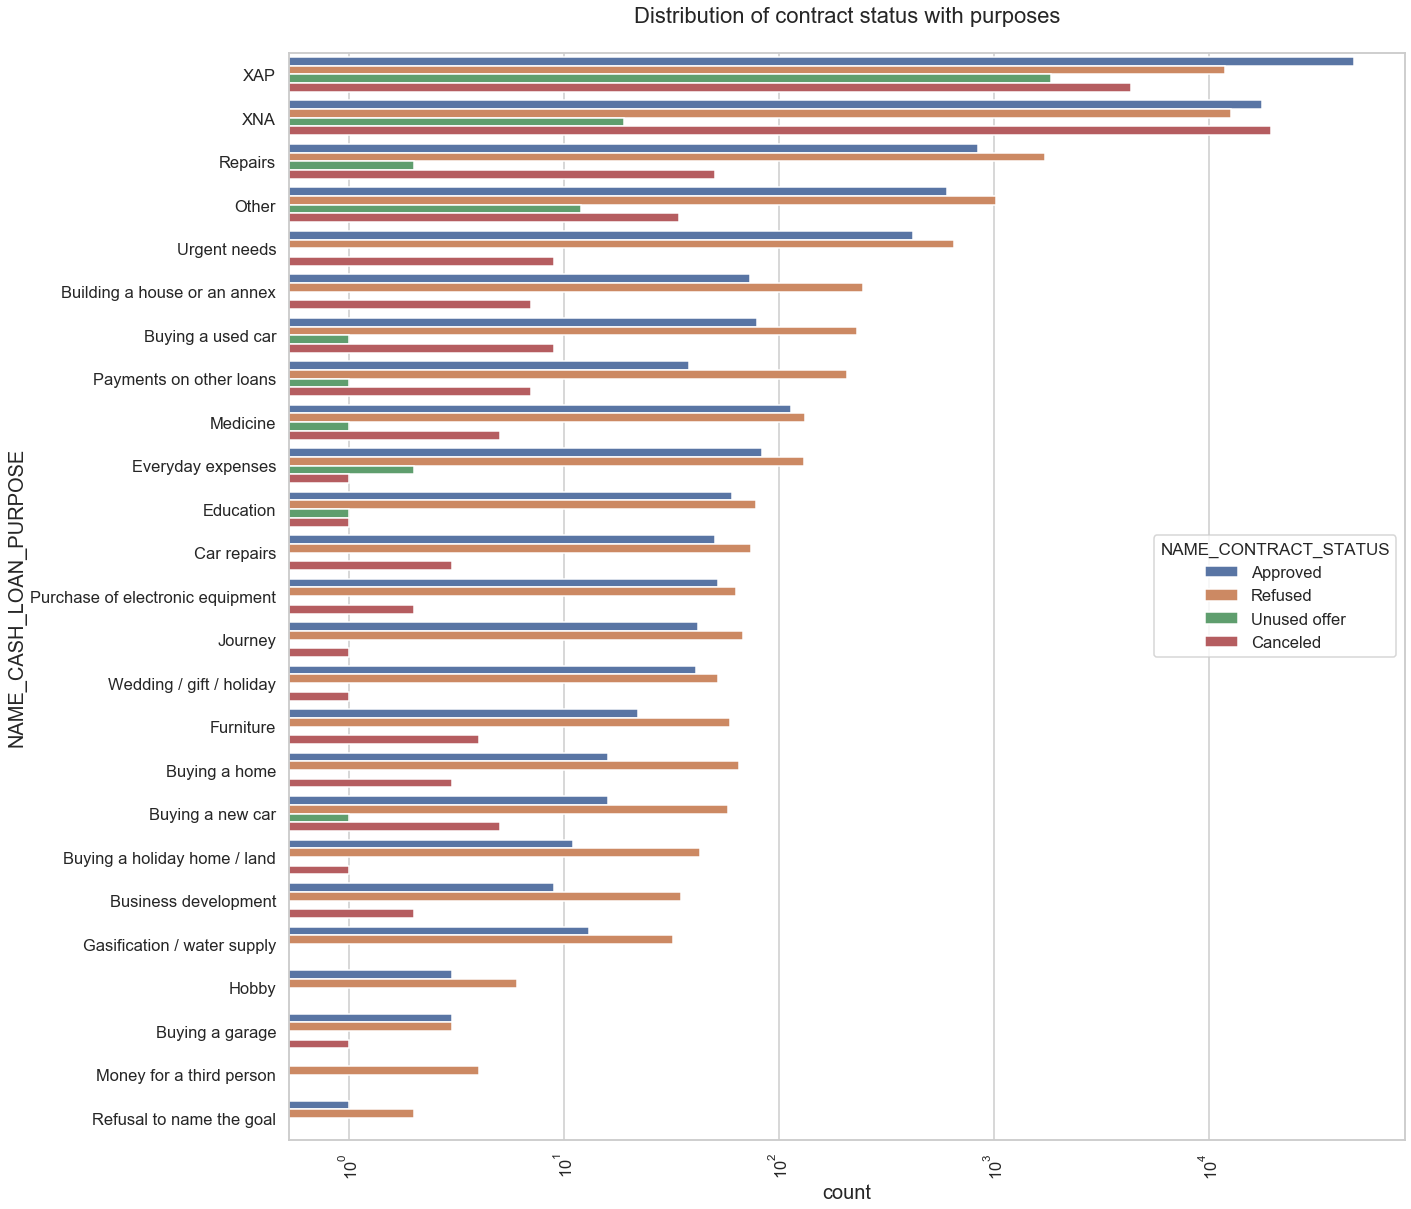

In [108]:
# Distribution of contract status in logarithmic scale
probDefaulter3=merged_data1.loc[merged_data1["TARGET"]==1]
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = probDefaulter3, y='NAME_CASH_LOAN_PURPOSE', order=probDefaulter3['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

# PROBABLE DEFAULTER DATASET - NAME INCOME TYPE -NAME CONTRACT STATUS

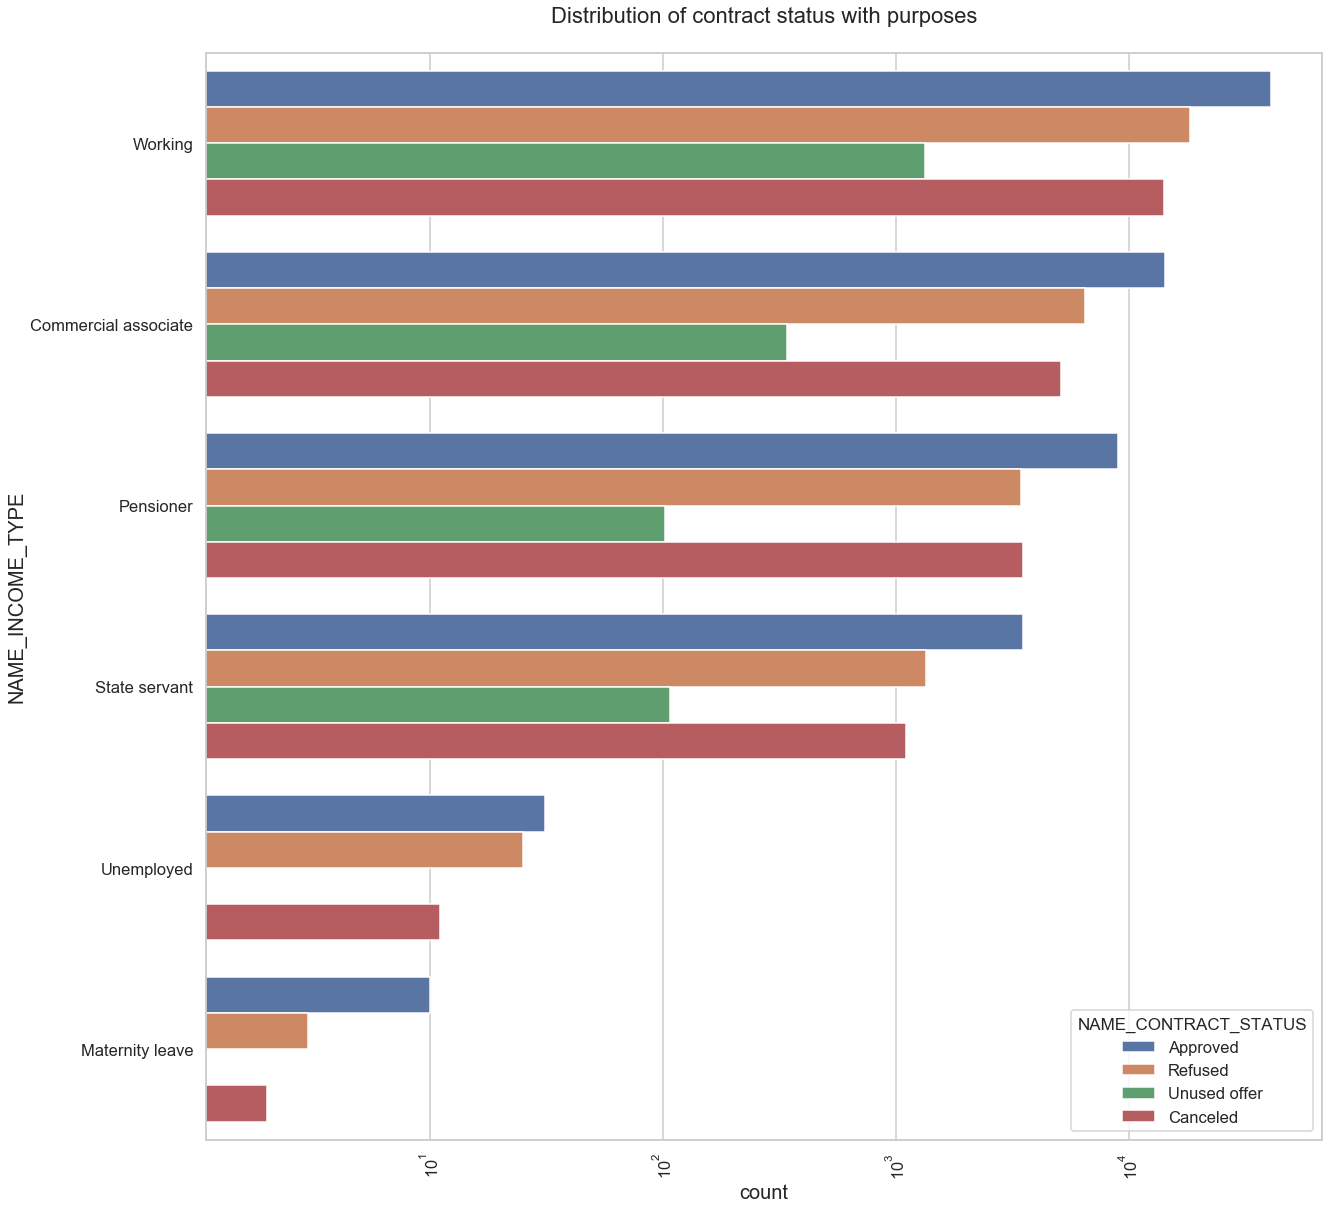

In [109]:
# Distribution of contract status in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = probDefaulter3, y='NAME_INCOME_TYPE', order=probDefaulter3['NAME_INCOME_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

In [110]:
bins = [0,1500000,3000000,4500000,6000000]
slots = ['0-15','15-30','30-45', '>45']
probDefaulter3['AMT_CREDIT_y_RANGE']=pd.cut(probDefaulter3['AMT_CREDIT_y'],bins,labels=slots)
probDefaulter3['AMT_CREDIT_y_RANGE']=pd.cut(probDefaulter3['AMT_CREDIT_y'],bins,labels=slots)


C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\1025219\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


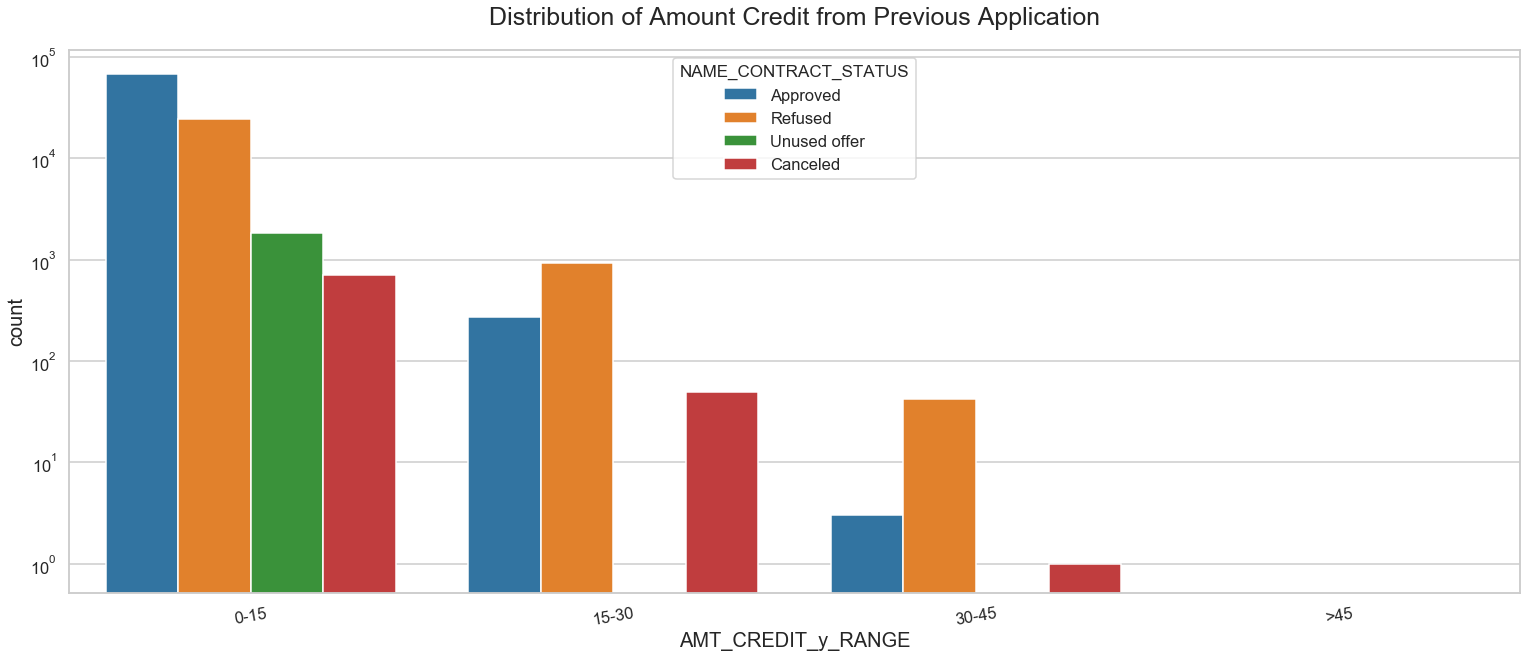

In [111]:
binnedplot(probDefaulter3,col='AMT_CREDIT_y_RANGE',title='Distribution of Amount Credit from Previous Application',hue='NAME_CONTRACT_STATUS')


# HEATMAPS AND MULTIVARIATE ANALYSIS

(4.5, -0.5)

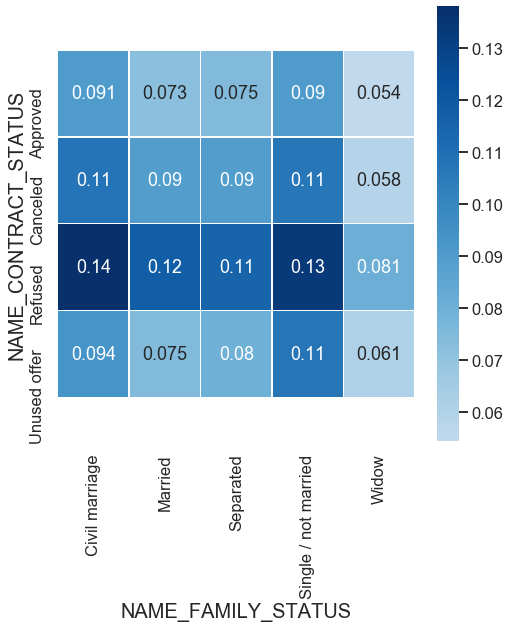

In [112]:
res=pd.pivot_table(data=merged_data1,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
plt.figure(figsize=(8,8))
merged_data1.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [113]:
# Recalling Binned Plots from above
# Creating bins for income amount
bins = [0,400000,800000,12000000,10000000000]
slots = ['Low','Medium','High', 'V. High']
merged_data1['AMT_INCOME_RANGE']=pd.cut(merged_data1['AMT_INCOME_TOTAL'],bins,labels=slots)


(4.5, -0.5)

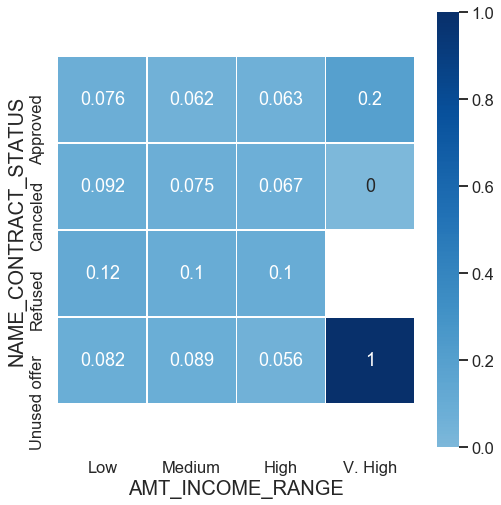

In [114]:
res=pd.pivot_table(data=merged_data1,index="NAME_CONTRACT_STATUS",columns="AMT_INCOME_RANGE",values="TARGET")
plt.figure(figsize=(8,8))
merged_data1.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(4.5, -0.5)

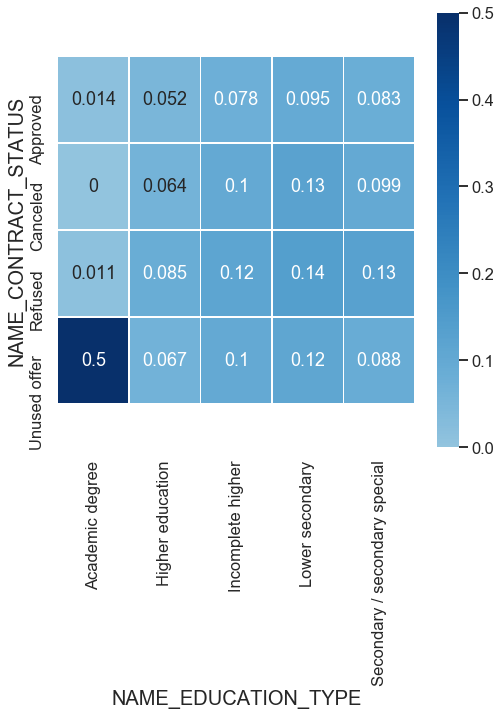

In [115]:
res=pd.pivot_table(data=merged_data1,index="NAME_CONTRACT_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET")
plt.figure(figsize=(8,8))
merged_data1.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(4.5, -0.5)

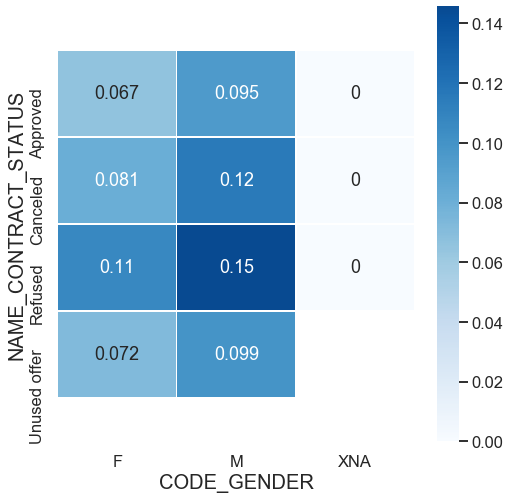

In [116]:
res=pd.pivot_table(data=merged_data1,index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET")
plt.figure(figsize=(8,8))
merged_data1.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(4.5, -0.5)

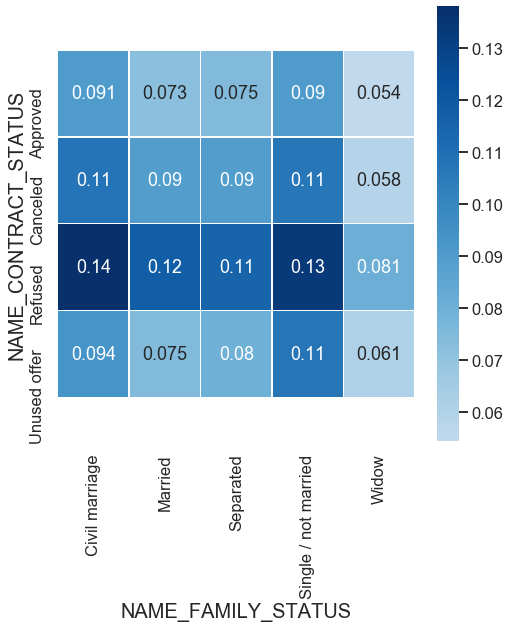

In [117]:
res=pd.pivot_table(data=merged_data1,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
plt.figure(figsize=(8,8))
merged_data1.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

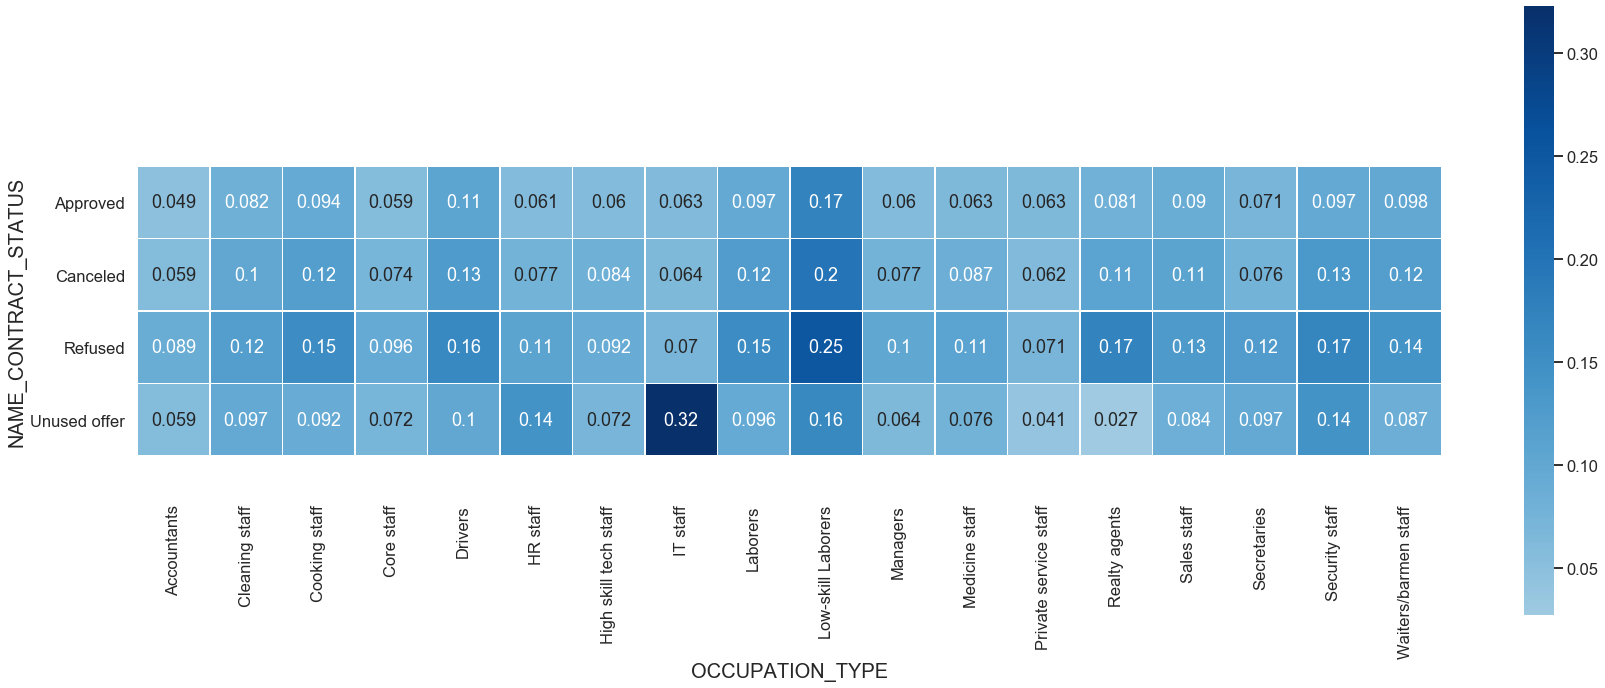

In [118]:
res=pd.pivot_table(data=merged_data1,index="NAME_CONTRACT_STATUS",columns="OCCUPATION_TYPE",values="TARGET")
plt.figure(figsize=(25,10))
merged_data1.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,center=0.0865,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()

In [119]:
#CNT_FAM_MEMBERS
merged_data1['Size_of_Family']=pd.cut(merged_data1.CNT_FAM_MEMBERS,[0,2,6,10,merged_data1.CNT_FAM_MEMBERS.max()],labels=['Small Family','Medium Family','Big Family','Large Family'])
print(merged_data1.Size_of_Family.unique())  


[Small Family, Medium Family, Big Family, Large Family]
Categories (4, object): [Small Family < Medium Family < Big Family < Large Family]


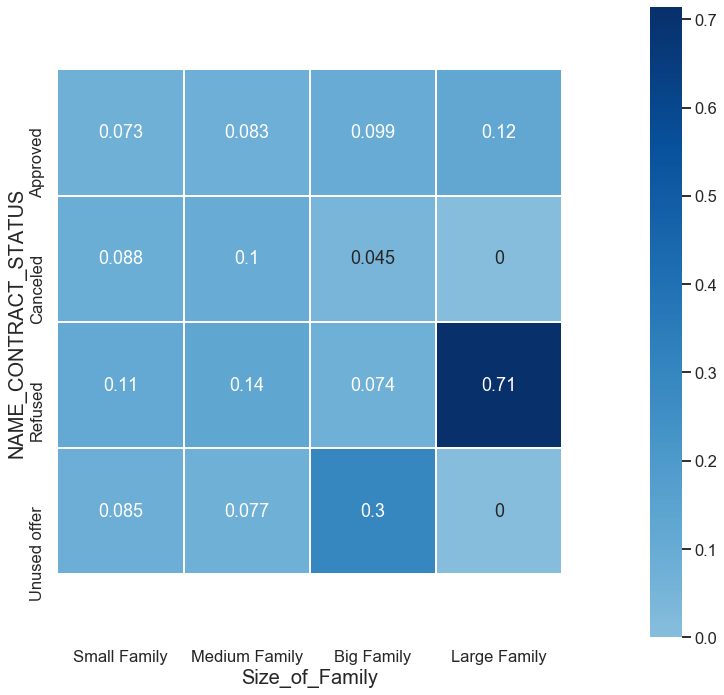

In [120]:
res=pd.pivot_table(data=merged_data1,index="NAME_CONTRACT_STATUS",columns="Size_of_Family",values="TARGET")
plt.figure(figsize=(25,10))
merged_data1.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,center=0.0865,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()

###### End of Code